In [2]:
# Prelude

import math
from matplotlib import pyplot as plt
import numpy as np

import scipy
from scipy import integrate
from scipy.special import comb
from scipy.stats import beta
from scipy.stats import binom 
from scipy.stats import norm   


Part I - Intro to probabilities
1. Chap 01 - Bayesian thinking and everyday reasoning
1. Chap 02 - Measuring incertainity
1. Chap 03 - The logic of uncertainity 
1. Chap 04 - Creating a binomial probability distribution 
1. Chap 05 - beta distribution

II - Bayesian Probability and prior probabilitities

6. Chap 06 - Conditional probability 
1. Chap 07 - Baye's theorem with Lego
1. Chap 08 - The prior, likelihood and posterior of baye's theorem
1. Chap 09 - Bayesian priors and working with probability distributions

III Parameter Estimation

10. Chap 10 - Introduction to averaging and parameter estimation
1. Chap 11 - Measuring the spread of our Data
1. Chap 12 - The normal distribution  
1. Chap 13 - Tools of parameter estimation : the PDF, CDF and quantile function  
1. Chap 14 - Parameter estimation with prior estimation  

IV Hypothesis testing : The heart of statistics

15. Chap 15 - From parameter estimation to hypothesis testing : building a Bayesian A/B test  
1. Chap 16 - Introduction to the Bayes factor and posterior ODDs : the competition of ideas  
1. Chap 17 - Bayesian reasoning in the twilight zone 
1. Chap 18 - When data does'nt convince you  
1. Chap 19 - From hypothesis testing to parameter estimation



# Chap 01 - Bayesian thinking and everyday reasoning

* UFO
* data informs beliefs; Belief should not inform data

# Chap 02 - Measuring incertainity

* odds = les cotes
* cote de 100 contre 5. Notre confiance dans H1 est 20 fois plus grande que dans H2 
  * P(H1) = 20 P(H2)
  * P(H1) = 20 (1 - P(H1))
  * P(H1) = 20/21 
  * $P(H)= \frac{Odd(H)}{1+Odd(H)}$
  * $O(H)= \frac{P(H)}{1-P(H)}$
* Pas hésiter à raisoner en paris
  * je donne 1000 si ils existent. 
  * je recois 1 si ils existent pas
  * => je crois 1000 fois plus que les OVNI existent pas

# Chap 03 - The logic of uncertainity 

* P(A et B) = P(A, B) = P(A) * P(B)
* Mutuellement exclusives
  * P(A ou B) = P(A) + P(B)
  * A et B mutuellement excusive <=> P(A) * P(B) = 0
* Pas mutuellement exclusives
  * P(A ou B) = P(A) + P(B) - P(A et B)
  * Penser aux ensembles

# Chap 04 - Creating a binomial probability distribution 

* la proba que k events arrivent sur n tests si leur proba est p
* PMF : 
  * proba mass function
  * Mass car on peut calculer la proba pour n'importe quel k pour n et p fixé
  * Bref c'est pas une densité
* ```scipy.special.binom.pmf(k, n, p)```


```
k_values = list(range(n + 1))
dist = binom.pmf(k_values, n, p)  
plt.bar(k_values, dist)
``` 

* ATTENTION : dans scipy, CDF c'est la somme des probas avec X inférieur ou égal à k
  * l'opposé c'est X strictement supérieur à k
  * si on veut inclure k, il faut démarrer de k-1
  * Si on veut les probas de k=2 jusqu'à 100 faut faire 
    * ```1 - binom.cdf(2-1, 100, p)```
    * ou alors ```binom.sf(2-1, 100, p) # sf vs cdf```



In [2]:
# p38
# import math

math.comb(3, 2)

3

In [3]:
# p38
# from scipy.special import comb

comb(3,2)

3.0

In [4]:
# p39
# from scipy.stats import binom 

# PMF = probability Mass Function
print(binom.pmf(12, 24, 1/2).round(4))
print()


0.1612



In [5]:
# p40
# from matplotlib import pyplot as plt
# from scipy.stats import binom 

n = 10
p = 1/2

# PMF = probability Mass Function
# valeur pour k=5
print(binom.pmf(5, n, p).round(3))
print()


0.246



In [6]:
# p40
# from matplotlib import pyplot as plt
# from scipy.stats import binom 

n = 10
p = 1/2

for k in range(10+1):
  print(k, binom.pmf(k, 10, 1/2).round(3))


0 0.001
1 0.01
2 0.044
3 0.117
4 0.205
5 0.246
6 0.205
7 0.117
8 0.044
9 0.01
10 0.001


In [7]:
# p40
# from matplotlib import pyplot as plt
# from scipy.stats import binom 

n = 10
p = 1/2
print(binom.pmf(list(range(10+1)), 10, 1/2).round(3))


[0.001 0.01  0.044 0.117 0.205 0.246 0.205 0.117 0.044 0.01  0.001]


Text(0, 0.5, 'B(k, 10, 1/2)')

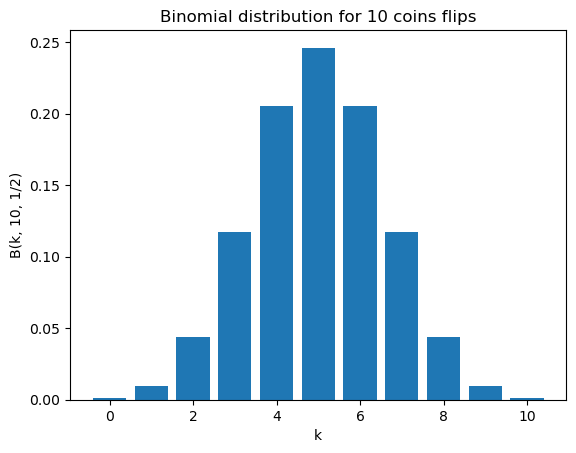

In [8]:
# p40
# from matplotlib import pyplot as plt
# from scipy.stats import binom 

n = 10
p = 1/2

k_values = list(range(n + 1)) 
dist = binom.pmf(k_values, n, p)  

plt.bar(k_values, dist); 
plt.title("Binomial distribution for 10 coins flips")
plt.xlabel("k")
plt.ylabel("B(k, 10, 1/2)")



Text(0, 0.5, 'B(k, 10, 1/6)')

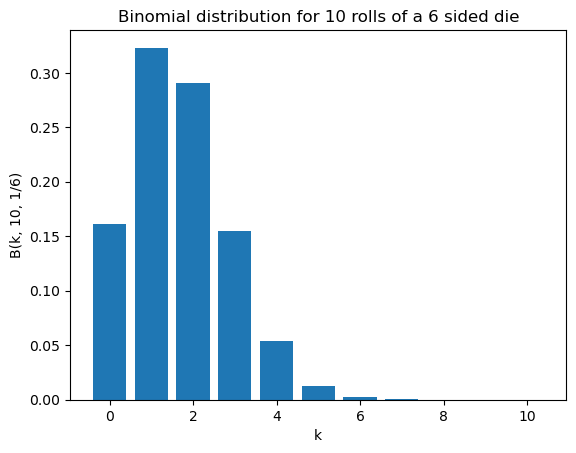

In [9]:
# p40
# from scipy.stats import binom 
# import matplotlib.pyplot as plt 

n = 10
p = 1/6
k_values = list(range(n + 1)) 

# list of pmf values 
dist = binom.pmf(k_values, n, p) 

plt.bar(k_values, dist); 
plt.title("Binomial distribution for 10 rolls of a 6 sided die")
plt.xlabel("k")
plt.ylabel("B(k, 10, 1/6)")

In [10]:
# p42
# from scipy.stats import binom 

n = 100
p = 0.720/100 # ET Jaynes p41 

# vérification du haut de la page 42
print("Proba to get 1 and only 1 card : ", binom.pmf(1, n, p).round(3))


Proba to get 1 and only 1 card :  0.352


In [ ]:
# p43
# from scipy.stats import binom 

n = 100
p = 0.00720

print("Proba to get 1 or more cards :")
print()

# retrouve le résultat p 43 "à la main"
probabilite_totale=0.0
for k in range (1, n+1):
 probabilite_totale += binom.pmf(k, n, p)
print("\tBy hand with for loop 1 :" , probabilite_totale.round(3))
print()

probabilites = [binom.pmf(k, n, p) for k in range(1, n+1)]
print("\tBy hand with for loop 2 :" , sum(probabilites).round(3))
print()

probabilite_totale = sum(binom.pmf(range(1, n+1), n, p))
print("\tBy hand with for loop 3 :" ,probabilite_totale.round(3))
print()

# The cumulative distribution function (cdf) evaluated at k, is the probability that the random variable (X) will take a value less than or equal to k. 
# Nous on veut la somme de [1 à 100]
# Donc c'est tout moins cdf(0)
probabilite_totale = 1 - binom.cdf(1-1, n, p)
print("\tbinom.cdf               :" ,probabilite_totale.round(3))
print()

# sf = 1 - cdf
# Z! c'est bien sf de 0
probabilite_totale = binom.sf(1-1, n, p)
print("\tbinom.sf (1 - cdf)    1 :", probabilite_totale.round(3))
print()






Proba to get 1 or more cards :

	By hand with for loop 1 : 0.515

	By hand with for loop 2 : 0.515

	By hand with for loop 3 : 0.515

	binom.cdf               : 0.515

	binom.sf (1 - cdf)    1 : 0.515



In [ ]:
# 3 p44
# from scipy.stats import binom 
k = 5
n = 10
p = 4/52
print(binom.pmf(k, n, p))
print(1/binom.pmf(k, n, p))


0.00045485528790408636
2198.501428020919


In [ ]:
# 4 p44
# k de 2 à 7
n = 7
p = 20/100

# proba = sum(binom.pmf(range(2, 8), n, p))
# print(proba.round(3))
# print()


# Cumulative distribution function
proba = 1 - binom.cdf(k=2-1, n=n, p=p)
print(proba.round(3))
print()

# survival function
# sf = 1 - cdf
proba = binom.sf(k=2-1, n=n, p=p)
print(proba.round(3))
print()




0.423

0.423



In [ ]:
# 5 p44
# https://github.com/Montanaz0r/Bayesian-Statistics-The-Fun-Way/tree/master

# from scipy.stats import binom 

p = 0.2
n = 7
k = 2

# survival function
# sf = 1 -cdf
probabilite_totale1 = binom.sf(k=2-1, n=n, p=p)
print(probabilite_totale1.round(3))
print()


probabilite_totale2 = sum(binom.pmf(range(2, 8), n, p))
print(probabilite_totale2.round(3))
print()

p = 0.1
n = 25
k = 2
probabilite_totale3 = binom.sf(k=k-1, n=n, p=p)
print(probabilite_totale3.round(3))
print()

if 2 * probabilite_totale1 <= probabilite_totale3:
  print('You should should take 25 interviews, for sure!')
else:
  print(f'You should not take it, the probability is only {probabilite_totale3/probabilite_totale1:.3f} times higher')


0.423

0.423

0.729

You should not take it, the probability is only 1.722 times higher


# Chap 05 - beta distribution
* Estimer la probabilité d'un event pour lequel on a dejà fait des essais et obtenu des succès
* En proba on nous donne les probas et on cherche à calculer les chances d'occurence de tel ou tel évènement (12 Pile de suite alors que proba de Pile = 1/2)
* En stat on a les données (12 Pile de suite) et on cherche à déterminer les probas
* stat = probas in reverse
  * Déduire des probas à partir des données => Inférences
  * DATA -> Inférences -> PROBAS  
* beta distribution est définie avec une PDF Probability Density Function
* elle est définie pour des valeurs continues (pas discrètes comme pour la lois binomiale)
* $Beta(p, \alpha, \beta) = \frac {p^{\alpha-1} (1-p^{\beta-1})}{beta(\alpha, \beta)} $
* $beta(\alpha, \beta) = \int_{0}^{1} p^{\alpha-1} (1-p^{\beta-1})dp$
* $\mu = \frac{\alpha}{\alpha+\beta}$
* $ n = \alpha + \beta $ 
* P(Rate_of_success | Rate_of_Success_and_Failure) = Beta ($\alpha$, $\beta$) voir p 84

### Code :

* surf = beta.cdf(x=p, a=a, b=b) # calcule la proba 

```
p_values = np.linspace(0, 1, 1000)
d_values = beta.pdf(p_values, a, b)  
plt.plot(p_values, d_values)

```

* Aire sous courbe jusqu'à p=0.5
```
surf = beta.cdf(x=.5, a=a, b=b)
```

* Valeur de p pour une surface de 30%
```
p = beta.ppf(30/100, a=a, b=b)
```


In [ ]:
# p48
# from scipy.stats import binom 

print(binom.pmf(14, 41, 1/2).round(5))
print(binom.pmf(14, 41, 14/41).round(5))

0.01603
0.13047


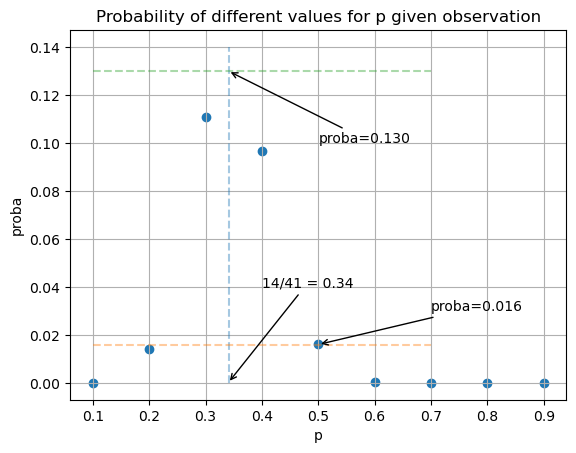

In [ ]:
# p48
# from scipy.stats import binom 
# import numpy as np
# import matplotlib.pyplot as plt 

def hline(y):
  plt.plot((0.1, 0.7),(y, y), linestyle='dashed', alpha=0.4)

def vline(x):
  plt.plot((x, x),(0.0, .14), linestyle='dashed', alpha=0.4)

k = 14
n = 41
p_values = np.linspace(0.1, 0.9, 9) 

dist = binom.pmf(k, n, p_values)  
plt.scatter(p_values, dist) 

vline(14/41)
hline(0.016)
hline(0.130)

plt.annotate("14/41 = 0.34", xy=(.34, 0.0), xytext=(.4, 0.04), arrowprops=dict(arrowstyle="->"))
plt.annotate("proba=0.130", xy=(.34, 0.13), xytext=(.5, 0.1), arrowprops=dict(arrowstyle="->"))
plt.annotate("proba=0.016", xy=(.5, 0.016), xytext=(.7, 0.03), arrowprops=dict(arrowstyle="->"))

plt.title("Probability of different values for p given observation")
plt.xlabel("p")
plt.ylabel("proba")
plt.grid()

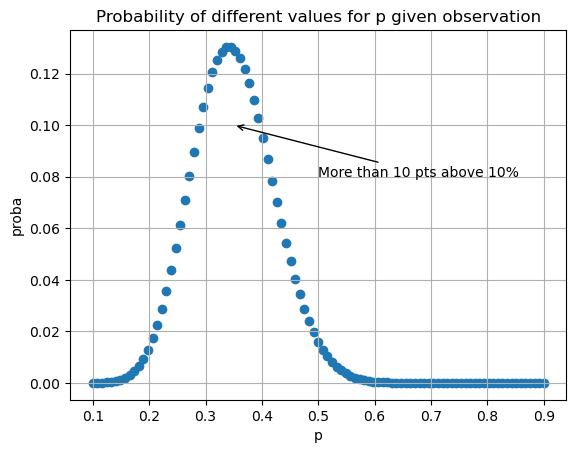

In [ ]:
# p48
# from scipy.stats import binom 
# import numpy as np
# import matplotlib.pyplot as plt 

k = 14
n = 41
p_values = np.linspace(0.1, 0.9, 99) 

# list of pmf values 
dist = binom.pmf(k, n, p_values)  
plt.scatter(p_values, dist) 

plt.annotate("More than 10 pts above 10%", xy=(.35, 0.1), xytext=(.5, 0.08), arrowprops=dict(arrowstyle="->"))

plt.title("Probability of different values for p given observation")
plt.xlabel("p")
plt.ylabel("proba")
plt.grid()

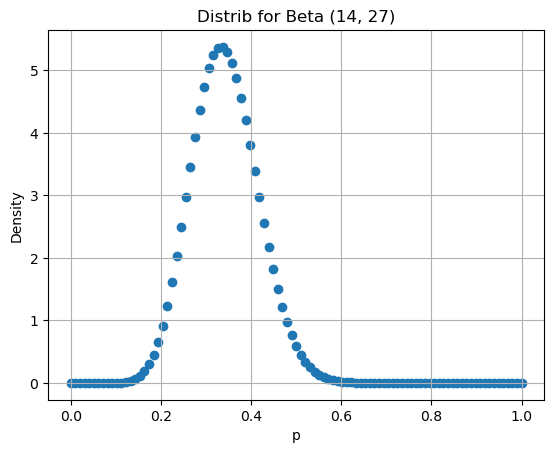

In [ ]:
# p51
# from scipy.stats import beta

a = 14
b = 41-a
p_values = np.linspace(0.0, 1.0, 99) 

# Probability Density Function - PDF
dist = beta.pdf(p_values, a, b)  
plt.scatter(p_values, dist) 

plt.xlabel("p")
plt.ylabel("Density")
plt.title("Distrib for Beta (14, 27)")
plt.grid()

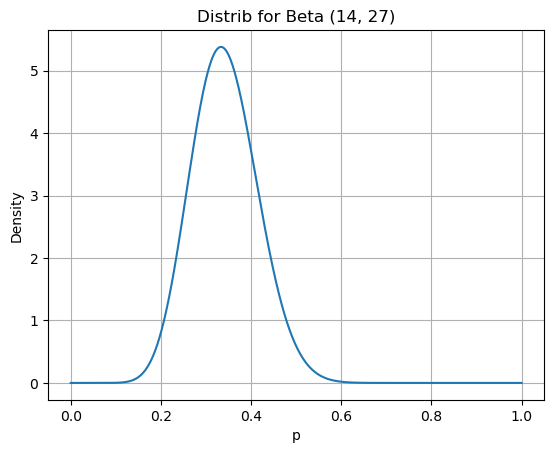

In [ ]:
# p51
# from scipy.stats import beta

a = 14
b = 41-a
p_values = np.linspace(0, 1, 1000)

# Probability Density Function - PDF
d_values = beta.pdf(p_values, a, b)  
plt.plot(p_values, d_values)

plt.xlabel("p")
plt.ylabel("Density")
plt.title("Distrib for Beta (14, 27)")
plt.grid()

* C'est un graphe de densité (intégrale=1)
* La majorité du graphe a une densité inf à 0.5
* Pas surprenant puisque les test montrent que jusqu'ici on récupère moins de la moitié des quarters introduits 
* Représente comment toutes les distributions binomiales décrivent les données observées
* L'aire sous la courbe c'est la proba que la chance de recevoir 2 pieces est inférieure à p
  * Permet de quantifer notre croyance/connaissance de p

In [ ]:
# p53
# Intégrale sous la courbe

# from scipy.stats import beta

a = 14
b = 41-a
p = 0.5
surf = beta.cdf(x=p, a=a, b=b) # cdf Cumulative Distribution Function
print(surf.round(3))

0.981


* 98%
* la probabilité que "la chance de recevoir 2 pieces est inférieure à 1/2"

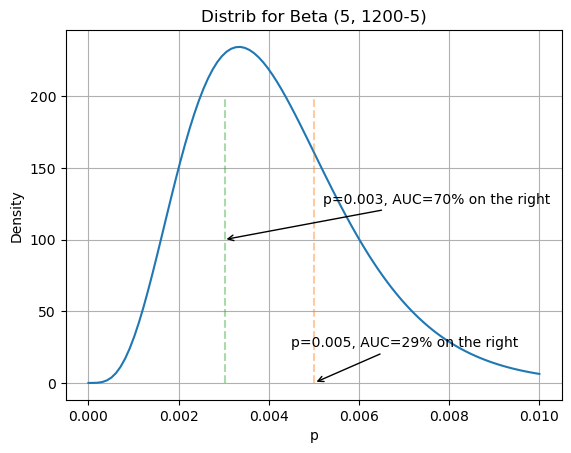

In [ ]:
# p54
# from scipy.stats import beta

a = 5
b = 1200-a
p_values = np.linspace(0.0, 0.010, 99) 

# Probability Density Function - PDF
d_values = beta.pdf(x=p_values, a=a, b=b)  

plt.plot(p_values, d_values) 

# lignes verticales
plt.plot((0.005, 0.005),(0.0, 200), linestyle='dashed', alpha=0.4)
plt.plot((0.00303, 0.00303),(0.0, 200), linestyle='dashed', alpha=0.4)

plt.annotate("p=0.005, AUC=29% on the right", xy=(.005, 0.0), xytext=(.0045, 25), arrowprops=dict(arrowstyle="->"))
plt.annotate("p=0.003, AUC=70% on the right", xy=(.003, 100.0), xytext=(.0052, 125), arrowprops=dict(arrowstyle="->"))

plt.xlabel("p")
plt.ylabel("Density")
plt.title("Distrib for Beta (5, 1200-5)")
plt.grid()

La majeure partie de la densité de proba se situe à des probas p inf à 0.01

In [ ]:
# p54
# Intégrale sous la courbe
# Attention on fait bien 1 - l'intégrale jusqu'à 0.005 car on veut savoir combien est au dessus de 0.005
# from scipy.stats import beta

a = 5
b = 1200-a
p = 0.005
surf = 1 - beta.cdf(x=p, a=a, b=b)
print(surf.round(3))

0.285


In [ ]:
# on veut que la surface sous la courbe à droite de p réprésente 70%
# donc la partie à gauche représente 30%

a = 5
b = 1200-a

p = beta.ppf(30/100, a=a, b=b)
print(p.round(5))


0.00303


## Side note à propos de ppf

7.9399459768100815
2.0600540231899185


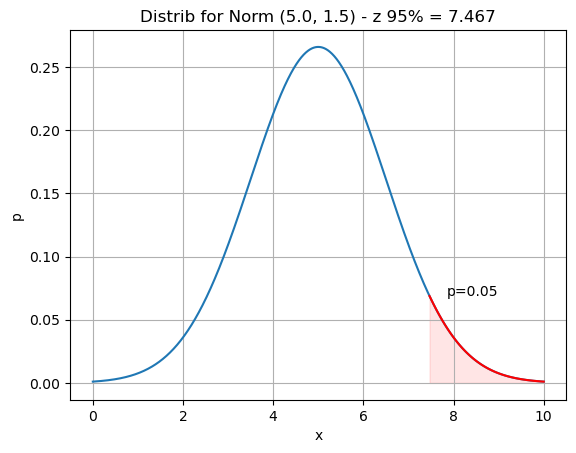

In [92]:
min = 0
max = 10
x_values = np.linspace(min, max, 1000) 

my_mean = (min+max)/2
my_std  = 1.5
y_values = norm.pdf(x=x_values, loc=my_mean, scale=my_std)  

fig, ax = plt.subplots()
ax.plot(x_values, y_values) 

z = norm.ppf(95/100, loc=my_mean, scale=my_std)
# print(f"z = {z:.3f}")

x_values2 = np.linspace(z, max, 1000)
y_values2 = norm.pdf(x_values2, loc=my_mean, scale=my_std)
ax.plot(x_values2, y_values2, color="red", alpha=1.00)
ax.fill_between(x_values2, y_values2, 0, color="red", alpha=0.1)

# ligne verticale et annotation
# ax.plot((z, z),(0.0, 0.10))
y_annot = norm.pdf(x=z, loc=my_mean, scale=my_std)  
ax.annotate("p=0.05", xy=(z*1.05, y_annot))


ax.set_xlabel("x")
ax.set_ylabel("p")
ax.set_title(f"Distrib for Norm ({my_mean}, {my_std}) - z 95% = {z:.3f}")
ax.grid()


[ 4.56005402 10.43994598]


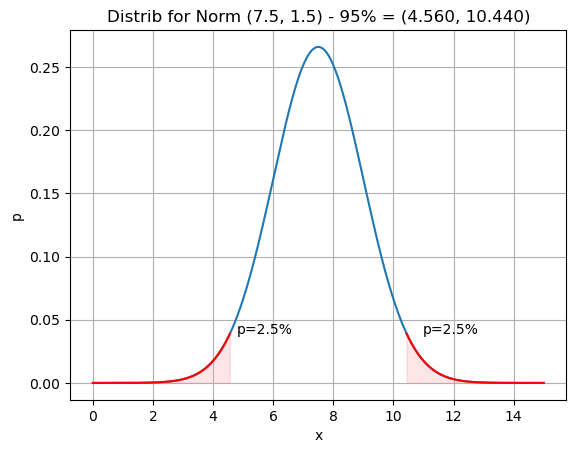

In [98]:
min = 0
max = 15
x_values = np.linspace(min, max, 1000) 

my_mean = (min+max)/2
my_std  = 1.5
y_values = norm.pdf(x=x_values, loc=my_mean, scale=my_std)  

fig, ax = plt.subplots()
ax.plot(x_values, y_values) 

# retourne un tableau avec les différents z correspondants
z = norm.ppf([2.5/100, 97.5/100], loc=my_mean, scale=my_std)
# print(z)

x_values2 = np.linspace(min, z[0], 1000)
y_values2 = norm.pdf(x_values2, loc=my_mean, scale=my_std)
ax.plot(x_values2, y_values2, color="red", alpha=1.00)
ax.fill_between(x_values2, y_values2, 0, color="red", alpha=0.1)

x_values3 = np.linspace(z[1], max, 1000)
y_values3 = norm.pdf(x_values3, loc=my_mean, scale=my_std)
ax.plot(x_values3, y_values3, color="red", alpha=1.00)
ax.fill_between(x_values3, y_values3, 0, color="red", alpha=0.1)


# ligne verticale et annotation
# ax.plot((z, z),(0.0, 0.10))
y_annot = norm.pdf(x=z[0], loc=my_mean, scale=my_std)  
ax.annotate("p=2.5%", xy=(z[0]*1.05, y_annot))
ax.annotate("p=2.5%", xy=(z[1]*1.05, y_annot))


ax.set_xlabel("x")
ax.set_ylabel("p")
ax.set_title(f"Distrib for Norm ({my_mean}, {my_std}) - 95% = ({z[0]:.3f}, {z[1]:.3f})")
ax.grid()


## Fin de la side note

Compte tenu de ce que l'on a observé : 
* 5 succes sur 1200 cartes
* la probabilité que le taux de tirage des bonnes cartes soit sup ou égal à 0.005 est de 29%
* notre pote ne va essayer le jeu que si la proba est de 70%
* Conclusion : faut pas qu'il joue



In [ ]:
# 1 p55

a = 4
b = 6
p = 0.6
surf = 1 - beta.cdf(x=p, a=a, b=b)
print(surf.round(3))


0.099


En gros 10% de chance d'avoir cette répartition si la piece est juste. 

In [ ]:
# 2 p55

a = 9
b = 11
p = 0.6
surf = beta.cdf(x=.55, a=a, b=b) - beta.cdf(x=.45, a=a, b=b)
print(surf.round(3))

0.31


Quelle est la proba que la piece soit fair ?
Notre definition de faire : 50% + ou - 5%
On cherche la proba que nos observation soient dans la gamme 45%-55%
On soustrait les 2 intégrales
On toruve 30%

In [ ]:
# 3 p55

a = 109
b = 111
p = 0.6
surf = beta.cdf(x=.55, a=a, b=b) - beta.cdf(x=.45, a=a, b=b)
print(surf.round(3))

0.859


On a maintenant 86% de chance que la piece soit fair.

# Chap 06 - Conditional probability 

* P( GBS |Flu ) 
  * proba de GBS sachant Flu
  * Il a eu le Flu en premier puis on se demande le risque qu'il ait le GBS ensuite (syndrom Guillain-Barré)
* 1.5 => 50% de chance en plus

* $P(A \text{ et } B) = P(A) * P(B | A) $
* $P(A \text{ ou } B) = P(A) + P(B) - P(A) * P(B|A) $

* Bien voir que $ P(A | B) = \frac{P(A)P(B|A)}{P(A)} = \frac {P(A \text{ et } B)}{P(B)}$
  * La proba d'avoir A sachant B c'est bien le rapport de la proba d'avoir A et B sur la proba d'avoir B
  * C'est le rapport de la surf de l'intersection de A et B sur la surf de B


En général on veut quantifier
  * la force de notre hypothèse alors qu'on acquiert des données/information 
  * $ P(H | D) = \frac{P(H)P(D|H)}{P(D)} = \frac{P(H, D)}{P(D)} $

# Chap 07 - Baye's theorem with Lego

# Chap 08 - The prior, likelihood and posterior of baye's theorem

* $ P(H | D) = \frac{P(H, D)}{P(D)} = \frac{P(H)P(D|H)}{P(D)} $
  * le rapport de la surface de l'intersection de H et D sur la surface de D
* $ P(H | D) $ A_Posteriori

À droite : 
* $ P(H)$ 
  * A_priori
  * Prior 
  * La probabilité de l'hypothèse en l'état de nos connaissances
* $ P(D | H) 
  * Vraissemblance
  * On considère l'hypothèse vraie
  * Quelle est alors la probabilité d'observer les données
  * Peut valoir 1
* $P(D)$ Probabilité marginale
  * elle normalise
  * fait en sorte que A_Posteriori soit bien entre 0 et 1
  * Difficile à déterminer en général
  * On peut s'en passer quand on compre 2 A_priori
  * Par exemple on forme une nouvelle hypothèse (Colonel Moutarde)
    * On fait le calcul de $P(H_2)P(D|H_2)$
    * On le comprare à $P(H_1)P(D|H_1)$ (Mrs White)
    * On ne change pas (on ne tord pas) les données. 
      * On fait de nouvelles hypothèses 
      * et on quantifie P(H | D). La probabilité de l'hypothèse à l'aune des données disponibles

Ne pas oublier :
* $ P(H | D) $ c'est un rapport 
* c'est le rapport de la surface de la proba d'avoir (D et H) sur la surface de la proba d'avoir D

Si on a des soucis pour trouver D
* Faire le rapport de deux A_posteriori
* Comme ça on élimine D

Si on a des soucis pour trouver D
* $ P(H | D) \text{ } \alpha \text{ } P(H) * P(D|H)$
* A données/infos constantes
* La force de notre croyance dans l'hypothèse est proportionnelle à 
  * la proba de l'hypothèse en l'état de nos connaissances
  * et à la proba d'observer les données si on considère l'hypothèse est vraie
    * faut pas oublier le "si on considère l'hypothèse est vraie"

À garder en tête :
* $ P(H | D) = \frac{P(H, D)}{P(D)} = \frac{P(H)P(D|H)}{P(D)} $
* Donc si P(D) tend vers 0 alors P(H | D) croît
* Autrement dit : plus l'observation des données est rare et plus il faut une explication fracassante pour expliquer les données

# Chap 09 - Bayesian priors and working with probability distributions

* $Beta(\alpha_{post}, \beta_{post}) = Beta(\alpha_{like} + \alpha_{prior}, \beta_{like} + \beta_{prior})$


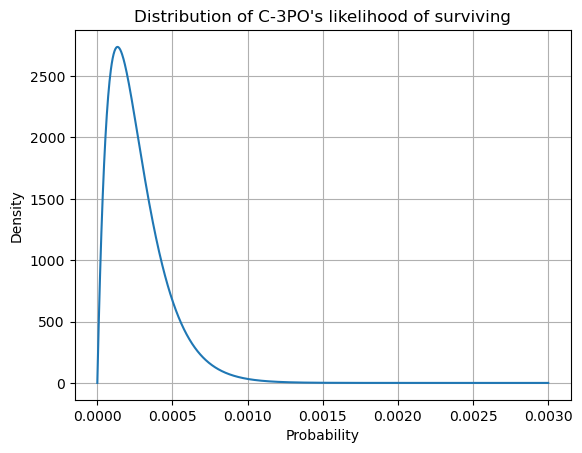

In [ ]:
# p85
# from scipy.stats import beta

a = 2
b = 7440
p_values = np.linspace(0.0, 0.003, 1000) 

# Probability Density Function - PDF
dist = beta.pdf(x=p_values, a=a, b=b)   
plt.plot(p_values, dist) 

plt.xlabel("Probability")
plt.ylabel("Density")
plt.title("Distribution of C-3PO's likelihood of surviving")
plt.grid()

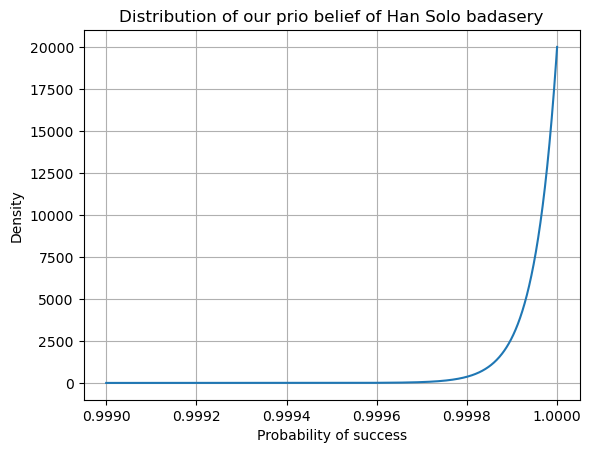

In [ ]:
# p86
# from scipy.stats import beta

a = 20000
b = 1
p_values = np.linspace(0.999, 1, 1000) 

# Probability Density Function - PDF
dist = beta.pdf(x=p_values, a=a, b=b)  
plt.plot(p_values, dist) 

plt.xlabel("Probability of success")
plt.ylabel("Density")
plt.title("Distribution of our prio belief of Han Solo badasery")
plt.grid()

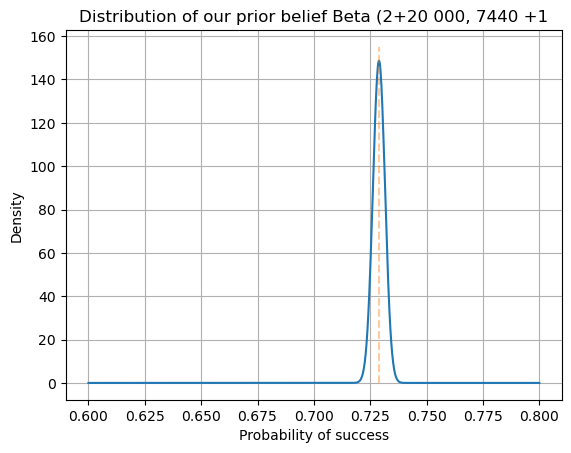

In [ ]:
# p89
# from scipy.stats import beta

a = 2 + 20000 
b = 7440 + 1
p_values = np.linspace(0.6, 0.8, 1000) 

# Probability Density Function - PDF
dist = beta.pdf(x=p_values, a=a, b=b)  
plt.plot(p_values, dist) 

plt.plot((0.729, 0.729),(0.0, 155), linestyle='dashed', alpha=0.4)

plt.xlabel("Probability of success")
plt.ylabel("Density")
plt.title("Distribution of our prior belief Beta (2+20 000, 7440 +1")
plt.grid()

In [ ]:
# 1 p89
# A friend finds a coin on the ground, flips it, and gets six heads in a row and then one tails. 
# Give the beta distribution that describes this.
# Use integration to determine the probability that the true rate of flipping heads is between 0.4 and 0.6, reflecting that the coin is reasonably fair.

a = 6
b = 1
p = 0.6
surf = beta.cdf(x=.6, a=a, b=b) - beta.cdf(x=.4, a=a, b=b)
print(surf.round(4))

0.0426


Avec ce résultat (6F, 1T) il y a 4% de chance que la pièce soit fair 

In [ ]:
# 2 p89
# Come up with a prior probability that the coin is fair. 
# Use a beta distribution such that there is at least a 95 percent chance that the true rate of flipping heads is between 0.4 and 0.6.

# Je comprends pas la question en fait...
# Fair => Alpha = Beta MAIS plus on aura de données plus on sera sûr que la pièce est fair
# On garde les 7 premiers tirages : 7 F et 1 T
# Si la piece est fair alors alpha et beta 
# Si on fait 20 tirages de plus, si la piece est faire on devrait avoir 10F et 10T (qui se rajoutent aux premiers tirgaes)
# On aurait : 

m = 10
a = 6+m
b = 1+m 
p = 0.
surf = beta.cdf(x=.6, a=a, b=b) - beta.cdf(x=.4, a=a, b=b)
print(surf.round(4))

# Du coup on est sûr que à 50% que la piece est faire
# Faut "plus de dents" => plus de tirages
# Quand on ajoute 54 tirages "fair" equireparti sur alpha et beta on a une proba à 95%

m = 54
a = 6+m
b = 1+m 
p = 0.
surf = beta.cdf(x=.6, a=a, b=b) - beta.cdf(x=.4, a=a, b=b)
print(surf.round(4))

0.4997
0.9504


In [ ]:
# Now see how many more heads (with no more tails) it would take to convince you that there is a reasonable chance that the coin is not fair. 
# In this case, let’s say that this means that our belief in the rate of the coin being between 0.4 and 0.6 drops below 0.5.

# try and error
# On rajoute des F mais pas de T jusqu'à ce que surf passe en dessous de 50%
more_heads = 23
m = 54
a = 6+m+more_heads
b = 1+m 
p = 0.
surf = beta.cdf(x=.6, a=a, b=b) - beta.cdf(x=.4, a=a, b=b)
print(surf.round(4))


0.4815


# Chap 10 - Introduction to averaging and parameter estimation

* On utilise la moyenne pour que les erreurs se compensent
* Plus on aura de données et plus la moyenne va se rapprocher de la moyenne vraie
* On pourra alors d'autant plus faire confiance à la moyenne calculée

# Chap 11 - Measuring the spread of our Data

In [15]:
# 2 p109
# import numpy as np

my_list = range(1,11)
print(f"{np.mean(my_list):.3f}")
print(f"{np.var(my_list):.3f}")
print(f"{np.std(my_list):.3f}")
# print(f"{np.std(my_list, ddof=1):.3f}") # Utilise pas ddof=1 car on considèere qu'on a la population

5.500
8.250
2.872
3.028


In [ ]:
# 2 p109
# import scipy

my_list = range(1,11)
print(f"{scipy.mean(my_list):.3f}")
print(f"{scipy.var(my_list):.3f}")
print(f"{scipy.std(my_list):.3f}")

5.500
8.250
2.872


C:\Users\phili\AppData\Local\Temp\ipykernel_444\779800112.py:5: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  print(f"{scipy.mean(my_list):.3f}")
C:\Users\phili\AppData\Local\Temp\ipykernel_444\779800112.py:6: DeprecationWarning: scipy.var is deprecated and will be removed in SciPy 2.0.0, use numpy.var instead
  print(f"{scipy.var(my_list):.3f}")
C:\Users\phili\AppData\Local\Temp\ipykernel_444\779800112.py:7: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  print(f"{scipy.std(my_list):.3f}")


# Chap 12 - The normal distribution  

* L'estimation de paramètre consiste à donner une probabilité pour une gamme de valeurs possibles
* plus c'est dispersé moins on est sûr
* la distribution normale c'est une distribution continue de probas
* valeurs continues
* reflète la confiance que l'on a dans la valeur de la moyenne
on peut evaluer des probas pour des valeurs inf ou sup à celles utilisées pour le calcul de $\mu$ et $\sigma$
* On utilise Normal Dist uniquement si on ne connait rien d'autre que $\mu$ et $\sigma$
  * p 121
  * il est préférable d'utiliser Beta dont l'intervale de variation de la moyenne est plus resséré (courbe plus pointue)

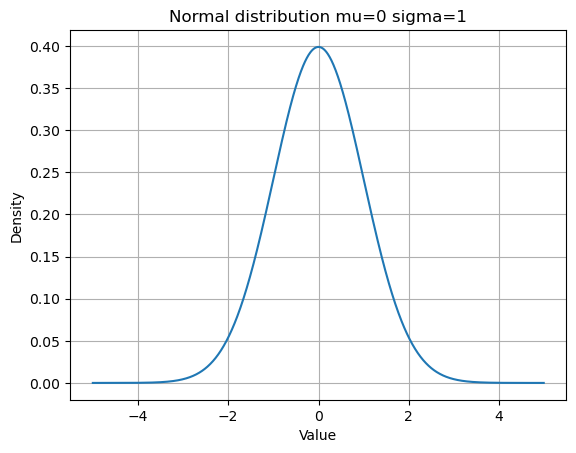

In [ ]:
# p114
# from scipy.stats import norm   

x_values = np.arange(-5, 5, 0.01)

mean = 0
stdev = 1
y_values = norm.pdf(x_values, mean, stdev)     

fig, ax = plt.subplots()
ax.set_title("Normal distribution mu=0 sigma=1")
ax.set_xlabel("Value")
ax.set_ylabel("Density")
ax.plot(x_values, y_values)
ax.grid()

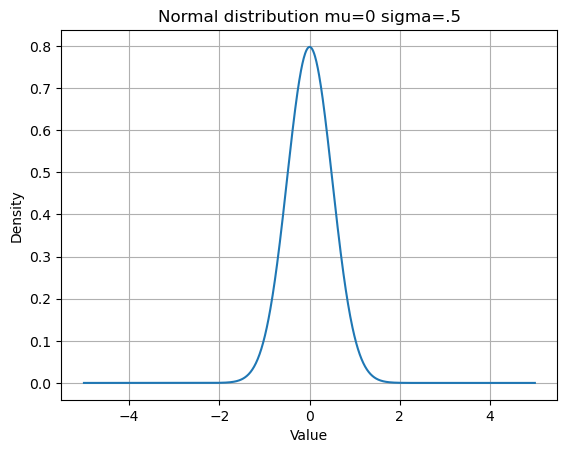

In [ ]:
# p115
# from scipy.stats import norm   

x_values = np.arange(-5, 5, 0.01)

mean = 0
stdev = .5
y_values = norm.pdf(x_values, mean, stdev)     

fig, ax = plt.subplots()
ax.set_title("Normal distribution mu=0 sigma=.5")
ax.set_xlabel("Value")
ax.set_ylabel("Density")
ax.plot(x_values, y_values)
ax.grid()

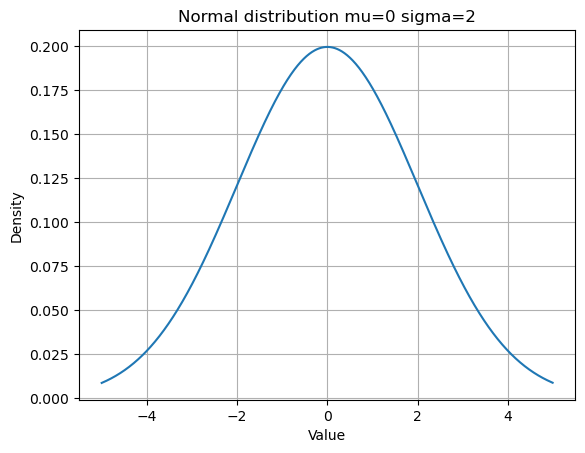

In [ ]:
# p115
# from scipy.stats import norm   

x_values = np.arange(-5, 5, 0.01)

mean = 0
stdev = 2
y_values = norm.pdf(x_values, mean, stdev)     

fig, ax = plt.subplots()
ax.set_title("Normal distribution mu=0 sigma=2")
ax.set_xlabel("Value")
ax.set_ylabel("Density")
ax.plot(x_values, y_values)
ax.grid()

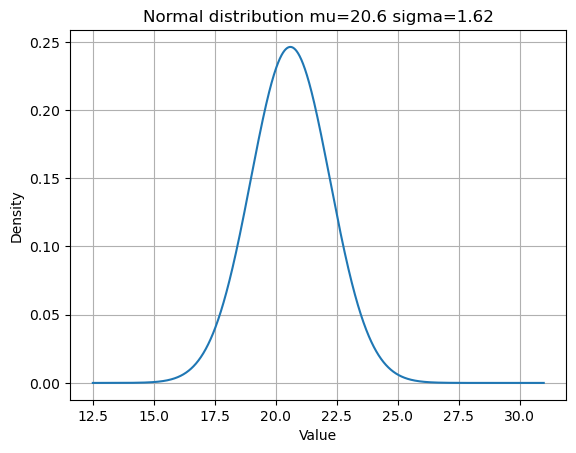

In [ ]:
# p116
# from scipy.stats import norm   

x_values = np.arange(12.5, 31, 0.01)

mean = 20.6
stdev = 1.62
y_values = norm.pdf(x_values, mean, stdev)     

fig, ax = plt.subplots()
ax.set_title("Normal distribution mu=20.6 sigma=1.62")
ax.set_xlabel("Value")
ax.set_ylabel("Density")
ax.plot(x_values, y_values)
ax.grid()

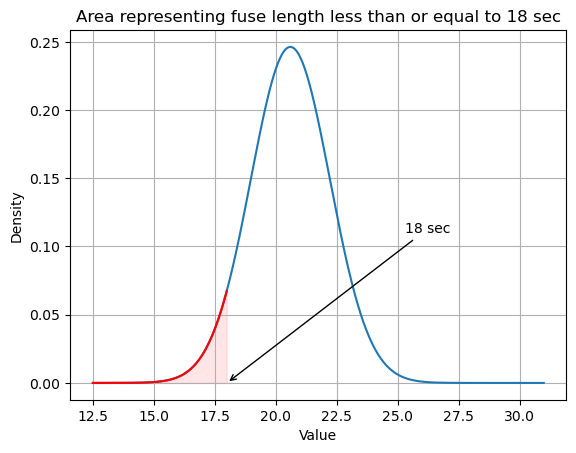

In [ ]:
# p117
# from scipy.stats import norm   

mean = 20.6
stdev = 1.62

x_values = np.arange(12.5, 31, 0.01)
y_values = norm.pdf(x_values, mean, stdev)     
fig, ax = plt.subplots()
ax.plot(x_values, y_values)

x_values2 = np.arange(12.5, 18, 0.01)
y_values2 = norm.pdf(x_values2, mean, stdev)
ax.plot(x_values2, y_values2, color="red", alpha=1.00)
ax.fill_between(x_values2, y_values2, 0, color="red", alpha=0.1)
ax.grid()

plt.annotate("18 sec", xy=(18.0, 0.0), xytext=(25.3, 0.11), arrowprops=dict(arrowstyle="->"))

ax.set_title("Area representing fuse length less than or equal to 18 sec")
ax.set_xlabel("Value")
ax.set_ylabel("Density");


* La surface sous la courbe représente, en fonction des observations, la probabilité que la mèche brûle 18 sec ou moins
* Voir que aucune des observations n'étaient inférieure à 18 sec mais la distribution nous permet quand même de calculer la proba

In [ ]:
#  p118

# from scipy import integrate
# import numpy as np
# from scipy.stats import norm   

mean = 20.6
stdev = 1.62
val = lambda x: norm.pdf(x, mean, stdev)
integrate.quad(val, -np.inf, 18)

(0.05425369499538672, 1.7932198256019502e-10)

In [ ]:
#  p118

# from scipy.stats import norm   

mean = 20.6
stdev = 1.62
surf = norm.cdf(18, mean, stdev)
surf

0.054253694995386695

La proba que la mèche brûle 18 secondes ou moins est de 5 %

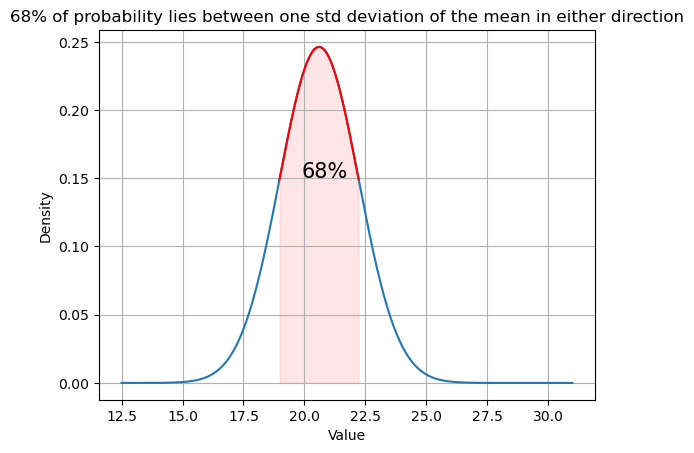

In [ ]:
# p119
# from scipy.stats import norm   

mean = 20.6
stdev = 1.62

x_values = np.arange(12.5, 31, 0.01)
y_values = norm.pdf(x_values, mean, stdev)     
fig, ax = plt.subplots()
ax.plot(x_values, y_values)

x_values2 = np.arange(mean-1*stdev, mean+1*stdev, 0.01)
y_values2 = norm.pdf(x_values2, mean, stdev)
ax.plot(x_values2, y_values2, color="red", alpha=1.00)
ax.fill_between(x_values2, y_values2, 0, color="red", alpha=0.1)

ax.set_title("68% of probability lies between one std deviation of the mean in either direction")
ax.set_xlabel("Value")
ax.set_ylabel("Density")
ax.grid()


plt.text(19.9, 0.15, '68%', fontsize = 15);


In [ ]:
# p119
# from scipy import integrate
# from scipy.stats import norm   

mean = 20.6
stdev = 1.62

val = lambda x: norm.pdf(x, mean, stdev)
surf = integrate.quad(val, mean-stdev, mean+stdev)
print(surf)

# much better option
surf = norm.cdf(mean+stdev, mean, stdev) - norm.cdf(mean-1*stdev, mean, stdev)
print(surf.round(3))


(0.6826894921370862, 7.579375928402479e-15)
0.683


In [ ]:
# p119

mean = 0
stdev = 1

surf = norm.cdf(mean+1*stdev, mean, stdev) - norm.cdf(mean-1*stdev, mean, stdev)
print("1 sigma : ", surf.round(3))

surf = norm.cdf(mean+2*stdev, mean, stdev) - norm.cdf(mean-2*stdev, mean, stdev)
print("2 sigma : ", surf.round(3))

surf = norm.cdf(mean+3*stdev, mean, stdev) - norm.cdf(mean-3*stdev, mean, stdev)
print("3 sigma : ", surf.round(3))


1 sigma :  0.683
2 sigma :  0.954
3 sigma :  0.997


In [ ]:
# p120 - n sigma events

# from scipy.stats import norm

mean = 0.0
stdev = 1.0

for i in range(1, 6+1):
  x = mean + i*stdev
  surf = norm.cdf(x, mean, stdev)
  surf = 1 - surf
  surf = 2 * surf
  print(f"Surface au delà de {i} x sigma : {surf}")
  print(f"{i} x sigma                    : 1 event every {1/(surf):.0f} days")
  print(f"{i} x sigma                    : 1 event every {(1/(surf))/365:_.0f} years")
  print()

Surface au delà de 1 x sigma : 0.31731050786291415
1 x sigma                    : 1 event every 3 days
1 x sigma                    : 1 event every 0 years

Surface au delà de 2 x sigma : 0.04550026389635842
2 x sigma                    : 1 event every 22 days
2 x sigma                    : 1 event every 0 years

Surface au delà de 3 x sigma : 0.002699796063260207
3 x sigma                    : 1 event every 370 days
3 x sigma                    : 1 event every 1 years

Surface au delà de 4 x sigma : 6.334248366623996e-05
4 x sigma                    : 1 event every 15787 days
4 x sigma                    : 1 event every 43 years

Surface au delà de 5 x sigma : 5.733031438470704e-07
5 x sigma                    : 1 event every 1744278 days
5 x sigma                    : 1 event every 4_779 years

Surface au delà de 6 x sigma : 1.973175400848959e-09
6 x sigma                    : 1 event every 506797317 days
6 x sigma                    : 1 event every 1_388_486 years



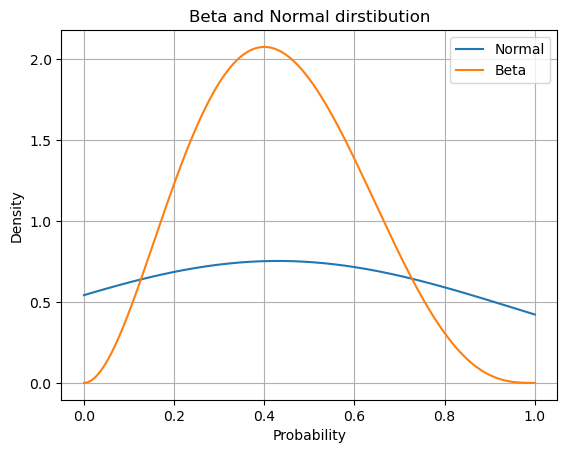

In [ ]:
# p121 - Beta and Normal distribution

# from matplotlib import pyplot as plt
# from scipy.stats import norm   
# from scipy.stats import beta

fig, ax = plt.subplots()

mean  = 0.43
stdev = 0.53

p_values1 = np.linspace(0, 1, 1000)
d_values1 = norm.pdf(p_values1, mean, stdev)     
ax.plot(p_values1, d_values1, label="Normal")

a = 3
b = 4
p_values2 = np.linspace(0, 1, 1000)
d_values2 = beta.pdf(x=p_values2, a=a, b=b) 
ax.plot(p_values2, d_values2, label="Beta")

ax.set_title("Beta and Normal dirstibution")
ax.set_xlabel("Probability")
ax.set_ylabel("Density")
ax.grid()
ax.legend();

* On utilise Normal Dist uniquement si on ne connait rien d'autre que $\mu$ et $\sigma$
* il est préférable d'utiliser Beta dont l'intervale de variation de la moyenne est plus resserré (courbe plus pointue)
* même si la distribution normale est un outil puissant ce n'est pas un suvstitue à la recherche de plus d'info sur le problème

In [ ]:
# 1 p122
# What is the probability of observing a value five sigma greater than the mean or more?

mean = 0
stdev = 1.0
val = norm.cdf(mean+5*stdev, mean, stdev)
print(1-val)

2.866515719235352e-07


In [16]:
# 2 p122
# A fever is any temperature greater than 100.4 degrees Fahrenheit.
# Given the following measurements, what is the probability that the patient
# has a fever?
# 100.0, 99.8, 101.0, 100.5, 99.7
val = np.array([100.0, 99.8, 101.0, 100.5, 99.7])
mean = np.mean(val)
stdev = np.std(val)
# stdev = np.std(val, ddof=1) # ! Est ce qu'on devrait pas utiliser ddof=1 car echantillon et il faudrait diviser par n-1 pas par n
print(mean)
print(stdev)



100.2
0.4857983120596447


La moyenne est inf à 100.4 et l'écart est de 0.2 soit 0.41 sigma

In [17]:
# proba pour qu'il soit sup à 100.4
val = norm.cdf(100.4, mean, stdev)
print(1-val)

0.3402820504876537


Il a 34% de chance d'avoir la fièvre

In [ ]:
# 3 p122
# Suppose in Chapter 11 we tried to measure the depth of a well by timing coin drops and got the following values : 2.5, 3, 3.5, 4, 2
# The distance an object falls can be calculated (in meters) with the following formula : distance = 1/2 × G × time²
# where G is 9.8 m/s/s. 
# What is the probability that the well is over 500 meters deep?

timings = np.array([2.5, 3, 3.5, 4, 2])
g = 9.8
distances = 1/2 * g * timings**2
mean = np.mean(distances)
stdev = np.std(distances)
# stdev = np.std(timings, ddof=1) # ! pourquoi ne pas utiliser ddof=1 ?

print(f"mean : {mean}")
print(f"std : {stdev}")

print((500-mean)/stdev)
# 500 m c'est à 21 ecarts type de la moyenne
# => no way

val = norm.cdf(500, mean, stdev)
print(1-val)
# Je comprends pas pourquoi j'ai rien de plus précis que 0.0




mean : 46.597500000000004
std : 20.911068346093654
21.682416818493113
0.0


In [14]:
# 3 p122
# Autre solution

timings = np.array([2.5, 3, 3.5, 4, 2])
mean = np.mean(timings)
stdev = np.std(timings)
# stdev = np.std(timings, ddof=1) # ! pourquoi ne pas utiliser ddof=1 ?

print(f"mean : {mean}")
print(f"std  : {stdev}")

# t for a 500 m deep well
g = 9.8
t = math.sqrt(2/g*500)
print("t pour un puit de 500m             : ", t)


print("Distance à la moy en ecart type    : ", (t-mean)/stdev)
# 10 s c'est à 10 ecarts type de la moyenne
# no way

val = norm.cdf(t, mean, stdev)
print("Proba que le puit soit sup à 500 m : ", 1-val)

val = lambda x: norm.pdf(x, mean, stdev)
p = integrate.quad(val, t, np.inf)
# Je suis pas d'accord avec le bouquin
# Il trouve 2.5E-24 alors que je trouve 5E-24
print(p)




mean : 3.0
std  : 0.7071067811865476
t pour un puit de 500m             :  10.101525445522107
Distance à la moy en ecart type    :  10.043073598594999
Proba que le puit soit sup à 500 m :  0.0
(4.927722620549658e-24, 3.801115860374315e-27)


In [ ]:
# 4 p122
# What is the probability there is no well (i.e., the well is really 0 meters deep)? 
# You’ll notice that probability is higher than you might expect, given your observation that there is a well. 
# There are two good explanations for this probability being higher than it should. 
# The first is that the normal distribution is a poor model for our measurements; 
# the second is that, when making up numbers for an example, I chose values that you likely wouldn’t see in real life. 
# Which is more likely to you?

timings = np.array([2.5, 3, 3.5, 4, 2])
mean = np.mean(timings)
stdev = np.std(timings)

print(f"mean : {mean}")
print(f"std  : {stdev}")

val = norm.cdf(0, mean, stdev)
print(val)

# La proba est faible mais pas nulle
# Dans la réponse il dit : As a Bayesian, generally you should favor questioning the model over the data





mean : 3.0
std  : 0.7071067811865476
1.1045248499292722e-05


# Chap 13 - Tools of parameter estimation : the PDF, CDF and quantile function  

* la proba qu'une valeur soit sup à la médiane est la même que la proba d'être inférieure 
* 50%
* Une probabitilité de 95% que la valeur se trouve entre 12 et 20 (2 $\sigma$)
* confidence interval = critical region = critical interval
* Avec la courbe CDF on peut :
  1. Trouver la médiane. On part de y=50% et on trouve x
  1. Approximer l'integrale entre 2 valeurs
      * on prend x1 et x2
      * on fait la différence entre y1 et y2
  1. Estimer l'intervalle de confiance à 80% par exemple
      * on trouve y1 = 100% - 10%
      * on trouve y2 =   0% + 10%
      * leur diférence c'est 80%
      * On trouve x1 et x2 qui sont les bornes de l'intervalle de confiance

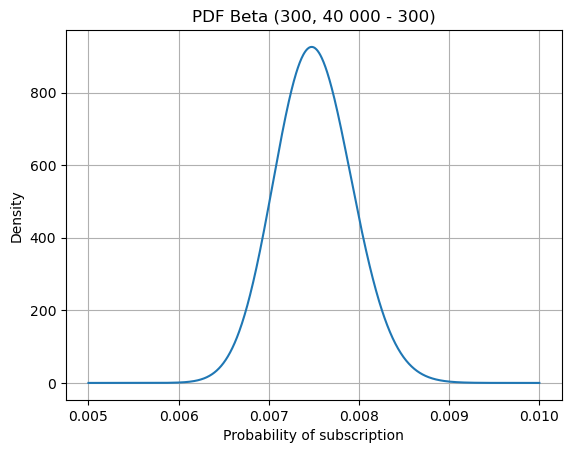

In [ ]:
# p125
# from scipy.stats import beta

a = 300
b = 40_000-a
p_values = np.linspace(0.005, 0.01, 1000)

# Probability Density Function - PDF
d_values = beta.pdf(x=p_values, a=a, b=b) 
plt.plot(p_values, d_values)

plt.xlabel("Probability of subscription")
plt.ylabel("Density")
plt.title("PDF Beta (300, 40 000 - 300)")
plt.grid()

### Bien voir que c'est PAS une distribution normale MAIS une Beta (300, 39_700)

In [ ]:
# p126

p_much_lower = beta.cdf(0.0065, 300, 39700)
print(p_much_lower.round(3))

p_much_higher = beta.sf(0.0085, 300, 39700)
print(p_much_higher.round(3))

ratio = p_much_higher/p_much_lower
print(ratio.round(3))

0.008
0.012
1.564


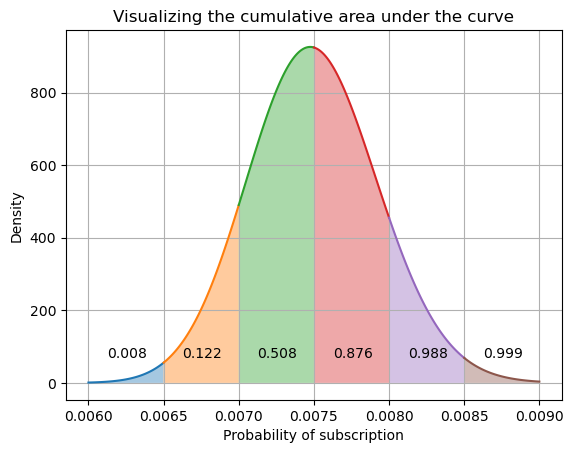

In [ ]:
# p128
# from scipy.stats import beta

a = 300
b = 40_000-a

# 6 segments => 7 values
p_val = np.linspace(0.006, 0.009, 7)
# values to be displayed
cum_surf = beta.cdf(x=p_val, a=a, b=b) 

for i in range(6):
  # lower and upper bound of the segment
  inf = p_val[i]
  sup = p_val[i+1]
  p_segment = np.linspace(inf, sup, 100)
  d_segment = beta.pdf(x=p_segment, a=a, b=b) 
  plt.plot(p_segment, d_segment)
  plt.fill_between(p_segment, d_segment, 0, alpha=0.4)
  plt.text(inf+(sup-inf)/4, 70, cum_surf[i+1].round(3), fontsize = 10)

plt.xlabel("Probability of subscription")
plt.ylabel("Density")
plt.title("Visualizing the cumulative area under the curve")
plt.grid()


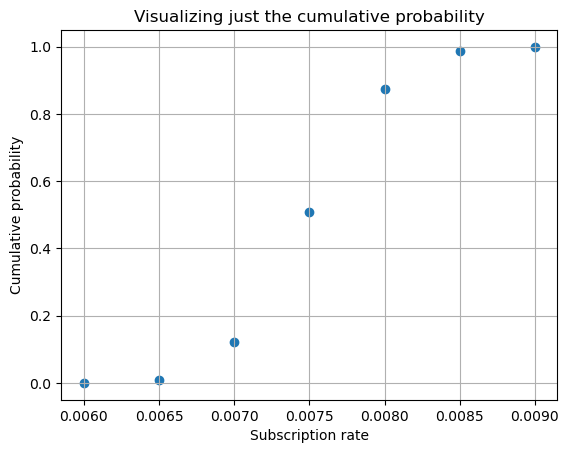

In [ ]:
# p129
# from scipy.stats import beta

a = 300
b = 40_000-a
p_values = np.linspace(0.006, 0.009, 7)

# Cumulative Distribution Function - CDF
d_values = beta.cdf(x=p_values, a=a, b=b) 
plt.scatter(p_values, d_values)
plt.xlabel("Subscription rate")
plt.ylabel("Cumulative probability")
plt.title("Visualizing just the cumulative probability")
plt.grid()

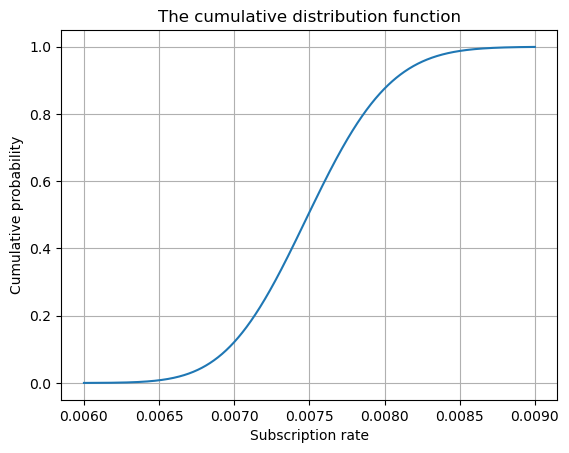

In [ ]:
# p129
# from scipy.stats import beta

a = 300
b = 40_000-a
p_values = np.linspace(0.006, 0.009, 1000)

# Cumulative Distribution Function - CDF
d_values = beta.cdf(x=p_values, a=a, b=b) 
plt.plot(p_values, d_values)
plt.xlabel("Subscription rate")
plt.ylabel("Cumulative probability")
plt.title("The cumulative distribution function")
plt.grid()

Text(0.5, 1.0, 'Estimating median')

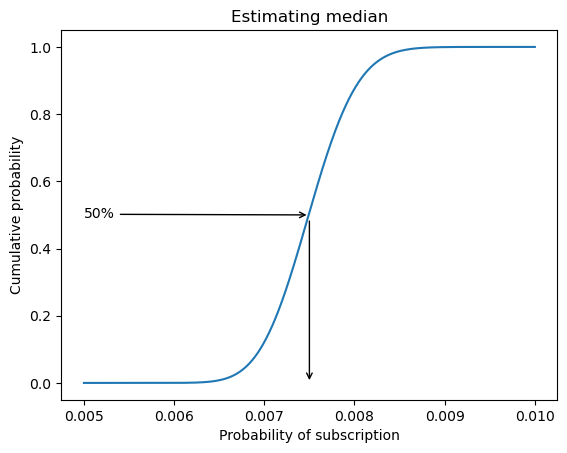

In [ ]:
# p130
# from scipy.stats import beta

a = 300
b = 40_000-a
p_values = np.linspace(0.005, 0.01, 1000)

# Cumulative Distribution Function - CDF
d_values = beta.cdf(x=p_values, a=a, b=b) 
plt.plot(p_values, d_values)

plt.annotate("50%", xy=(0.0075, 0.5), xytext=(0.005, 0.49), arrowprops=dict(arrowstyle="->"))
plt.annotate("", xy=(0.0075, 0.0), xytext=(0.0075, 0.49), arrowprops=dict(arrowstyle="->"))

plt.xlabel("Probability of subscription")
plt.ylabel("Cumulative probability")
plt.title("Estimating median")

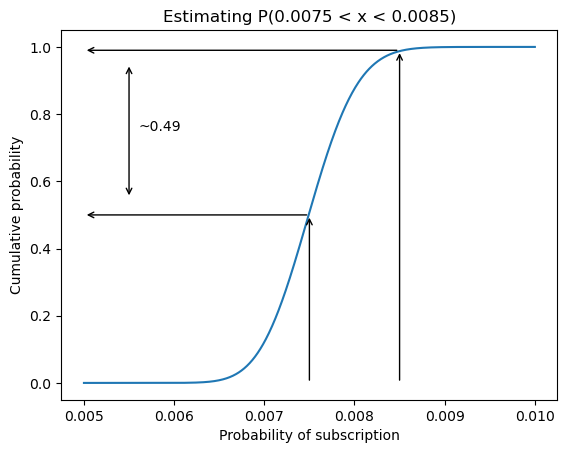

In [ ]:
# p131
# from scipy.stats import beta

# Not able to work with plt.arrow
# plt.arrow(0.0055, 0.55, 0.0, 0.4, length_includes_head=True, width=0.00001, head_width=0.0002, head_length=0.04)

a = 300
b = 40_000-a
p_values = np.linspace(0.005, 0.01, 1000)

# Cumulative Distribution Function - CDF
d_values = beta.cdf(x=p_values, a=a, b=b) 
plt.plot(p_values, d_values)

plt.annotate("", xy=(0.0075, 0.5), xytext=(0.0075, 0.0), arrowprops=dict(arrowstyle="->"))
plt.annotate("", xy=(0.0085, 0.99), xytext=(0.0085, 0.0), arrowprops=dict(arrowstyle="->"))

plt.annotate("", xy=(0.005, 0.5), xytext=(0.0075, 0.5), arrowprops=dict(arrowstyle="->"))
plt.annotate("", xy=(0.005, 0.99), xytext=(0.0085, 0.99), arrowprops=dict(arrowstyle="->"))

plt.annotate("", xy=(0.0055, 0.95), xytext=(0.0055, 0.55), arrowprops=dict(arrowstyle="<->"))
plt.text(0.0056, 0.75, "~0.49")

plt.xlabel("Probability of subscription")
plt.ylabel("Cumulative probability")
plt.title("Estimating P(0.0075 < x < 0.0085)");

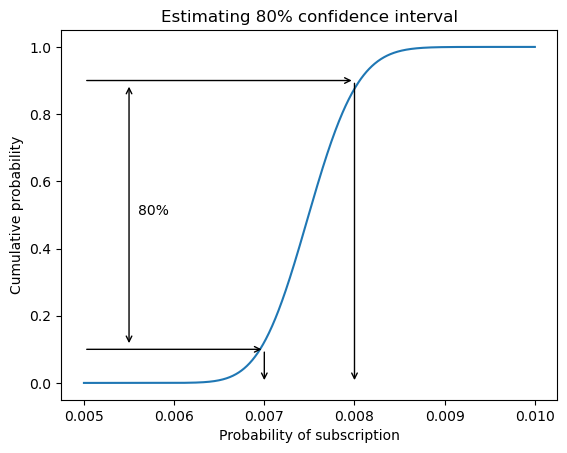

In [ ]:
# p132
# from scipy.stats import beta

a = 300
b = 40_000-a
p_values = np.linspace(0.005, 0.01, 1000)

# Cumulative Distribution Function - CDF
d_values = beta.cdf(x=p_values, a=a, b=b) 
plt.plot(p_values, d_values)

plt.annotate("", xy=(0.007, 0.0), xytext=(0.007, 0.1), arrowprops=dict(arrowstyle="->"))
plt.annotate("", xy=(0.008, 0.0), xytext=(0.008, 0.9), arrowprops=dict(arrowstyle="->"))

plt.annotate("", xy=(0.007, 0.1), xytext=(0.005, 0.1), arrowprops=dict(arrowstyle="->"))
plt.annotate("", xy=(0.008, 0.9), xytext=(0.005, 0.9), arrowprops=dict(arrowstyle="->"))

plt.annotate("", xy=(0.0055, 0.89), xytext=(0.0055, 0.11), arrowprops=dict(arrowstyle="<->"))
plt.text(0.0056, 0.5, "80%")

plt.xlabel("Probability of subscription")
plt.ylabel("Cumulative probability")
plt.title("Estimating 80% confidence interval");

In [ ]:
# p133
# from scipy.stats import beta
# from scipy.stats import binom 


a = 300
b = 40_000-a

# Cumulative Distribution Function - CDF
val = beta.cdf(x=0.0065, a=a, b=b)
print(val)

val = beta.cdf(1, a=a, b=b) - beta.cdf(0.0085, a=a, b=b)
print(val)

val = binom.cdf(3, 5, 0.5)
print(val)



0.007978686170755846
0.012481510301036725
0.8125


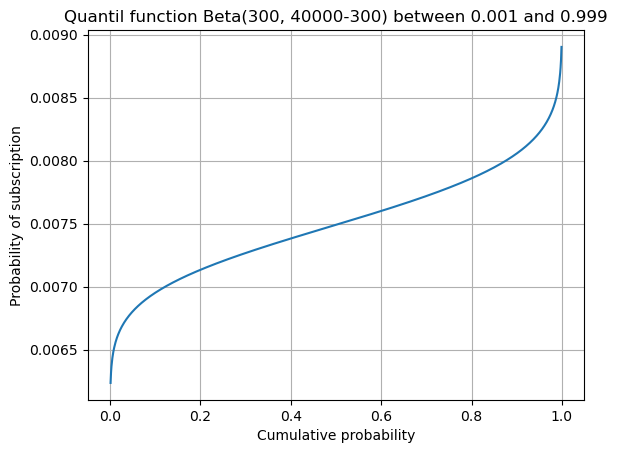

In [ ]:
# p134
# from scipy.stats import beta

a = 300
b = 40_000-a
cum_values = np.linspace(0.001, 0.999, 1000)

# Percent Point Function (inverse of CDF)
p_values = beta.ppf(cum_values, a=a, b=b) 

plt.plot(cum_values, p_values)
plt.xlabel("Cumulative probability")
plt.ylabel("Probability of subscription")
plt.title("Quantil function Beta(300, 40000-300) between 0.001 and 0.999")
plt.grid()

In [ ]:
# p135

a = 300
b = 40_000-a

# Percent Point Function (inverse of CDF)
val=beta.ppf(0.999, a, b)
print(val)


0.008903462119425339


We can be sure at 99.9% that the true conversion rate is less than 0.0089 (0.9%)

In [ ]:
# p135

a = 300
b = 40_000-a

# Percent Point Function (inverse of CDF)
lower=beta.ppf(0.025, a, b)
print(lower.round(7))

upper=beta.ppf(0.975, a, b)
print(upper.round(7))


0.0066781
0.0083686


We can be sure at 95% that the true conversion rate is between 0.66% and 0.83%

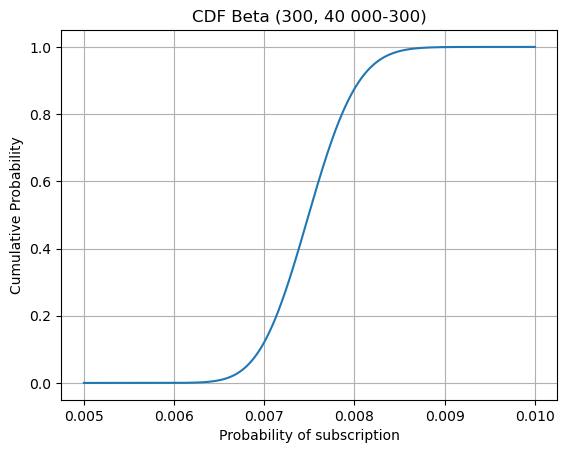

In [ ]:
# 1 p136
# Using the code example for plotting the PDF on page 127, plot the CDF and quantile functions.

a = 300
b = 40_000-a
p_values = np.linspace(0.005, 0.01, 1000)

# Plot CDF
# Cumulative Distribution Function
d_values = beta.cdf(x=p_values, a=a, b=b) 
plt.plot(p_values, d_values)
plt.xlabel("Probability of subscription")
plt.ylabel("Cumulative Probability")
plt.title("CDF Beta (300, 40 000-300)")
plt.grid()



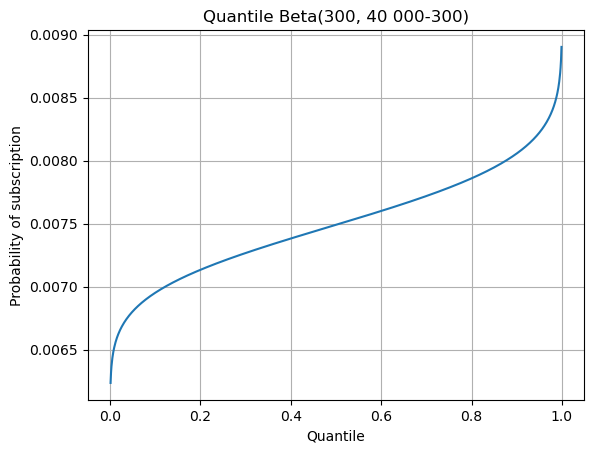

In [ ]:
a = 300
b = 40_000-a


# Plot Quantile
cum_values = np.linspace(0.001, 0.999, 1000)

# Percent Point Function (inverse of CDF)
p_values = beta.ppf(cum_values, a=a, b=b) 

plt.plot(cum_values, p_values)
plt.xlabel("Quantile")
plt.ylabel("Probability of subscription")
plt.title("Quantile Beta(300, 40 000-300)")
plt.grid() 

In [3]:
# 2 p136

# Returning to the task of measuring snowfall from Chapter 10, say you have the following measurements (in inches) of snowfall:
# 7.8, 9.4, 10.0, 7.9, 9.4, 7.0, 7.0, 7.1, 8.9, 7.4
# What is your 99.9 percent confidence interval for the true value of snowfall?

val = np.array([7.8, 9.4, 10.0, 7.9, 9.4, 7.0, 7.0, 7.1, 8.9, 7.4])

mean = np.mean(val)
std = np.std(val, ddof=1) # ! ddof=1 car on divise par n-1

# 99.9%
rest = 1 - 99.9/100
ci_hi = norm.ppf(1-rest/2, mean, std)
ci_lo = norm.ppf(rest/2, mean, std)
print(f"99.9% Confidence Interval = [{ci_lo:n}, {ci_hi:n}]")

# Check
print(norm.interval(99.9/100, mean, std))



99.9% Confidence Interval = [4.45606, 11.9239]
(4.456061591417139, 11.923938408582863)


Current confidence interval at 95% = (0.17938364923511188, 0.50832335380999)
95% Confidence Interval = [7.17535, 20.3329]


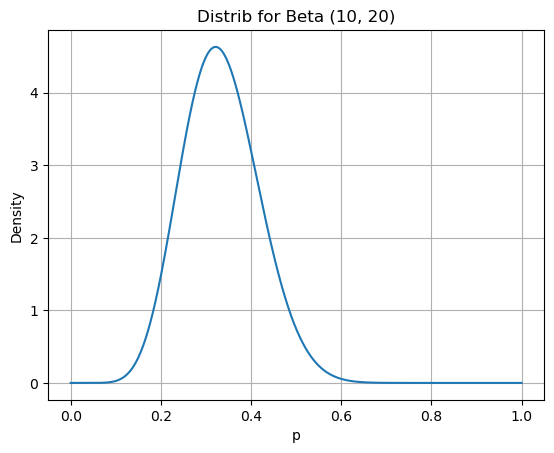

In [ ]:
# 3 p136

# A child is going door to door selling candy bars. 
# So far she has visited 30 houses and sold 10 candy bars. 
# She will visit 40 more houses today.
# What is the 95 percent confidence interval for how many candy bars she will sell the rest of the day?

# 10 succes 20 echec => beta distribution

a = 10
b = 20
p_values = np.linspace(0, 1, 1000)

# Probability Density Function - PDF
d_values = beta.pdf(x=p_values, a=a, b=b) 
plt.plot(p_values, d_values)
plt.xlabel("p")
plt.ylabel("Density")
plt.title("Distrib for Beta (10, 20)")
plt.grid()

# Confidence interval so far for 30 try
ci30 = beta.interval(95/100, a, b)
print(f"Current confidence interval at 95% = {ci30}")

# Si elle vend 40
lower = ci30[0]*40
upper = ci30[1]*40

print(f"95% Confidence Interval = [{lower:n}, {upper:n}]")






# Chap 14 - Parameter estimation with prior estimation  

* $ P(H | D) = \frac{P(H) * P(D|H)}{P(D)} $
* La probabilité que l'hypothèse soit juste au regard des données/infos/expériences
* $\text{A Posteriori} = \frac{\text{Vraissemblance} * \text{Prior}}{\text{Marginal}}$

Process :
* On a déjà des mesures => on a $\alpha_{like}$ et $\beta_{like}$
* On estime/choisit/trouve $\alpha_{prior}$ et $\beta_{prior}$
* On utilise : $Beta (\alpha_{posterior} + \beta_{posterior} = Beta(\alpha_{likelihood} + \alpha_{prior}, \beta_{likelihood}+ \beta_{prior}) $
* On trouve alors des estimations ajustées pour $\mu$ et $\sigma$ et l'intervalle de confiance


Si on nous donne une moyenne 
* alors $m = \frac{\alpha}{\alpha+\beta}$
* À m fixé, plus on est convaincu et plus ($\alpha \text{ et }  \beta$) sont grands

### Code
```
ci = beta.interval(95/100, a=a, b=b)
```


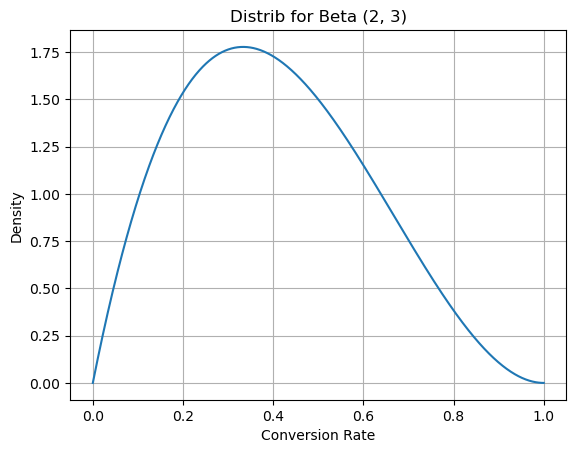

In [ ]:
# p138
# from scipy.stats import beta

a = 2
b = 3
p_values = np.linspace(0, 1, 1000)

# Probability Density Function - PDF
d_values = beta.pdf(x=p_values, a=a, b=b) 
plt.plot(p_values, d_values)
plt.xlabel("Conversion Rate")
plt.ylabel("Density")
plt.title("Distrib for Beta (2, 3)")
plt.grid()

In [ ]:
# p138

a = 2
b = 3
beta.interval(95/100, a=a, b=b)


(0.067585986488543, 0.8058795503167565)

In [ ]:
# p138

a = 2
b = 3
my_beta = beta(a=a, b=b)

print("Moyenne                  : ", my_beta.mean())
print("Ecart type               : ", my_beta.std())
print("Intervalle de conf à 95% : ", my_beta.interval(95/100))


Moyenne                  :  0.4
Ecart type               :  0.2
Intervalle de conf à 95% :  (0.067585986488543, 0.8058795503167565)


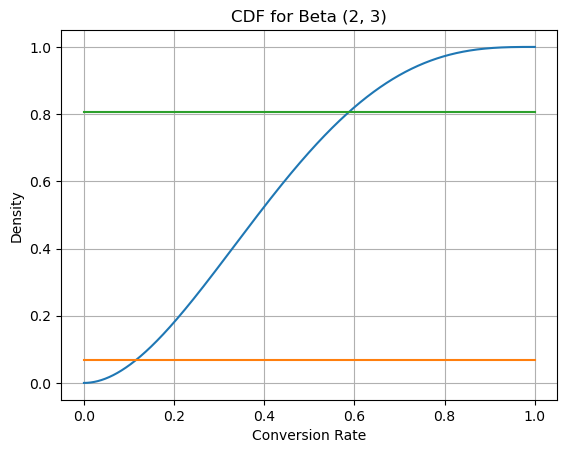

In [ ]:
# p139
# from scipy.stats import beta

a = 2
b = 3
p_values = np.linspace(0, 1, 1000)

# Probability Density Function - PDF
d_values = beta.cdf(x=p_values, a=a, b=b) 
plt.plot(p_values, d_values)
plt.plot()

plt.xlabel("Conversion Rate")
plt.ylabel("Density")
plt.title("CDF for Beta (2, 3)")
plt.grid()

# Display 95% CI with 2 H lines
ci95 = beta.interval(95/100, a=a, b=b)
plt.plot((0.0, 1.0),(ci95[0], ci95[0]))
plt.plot((0.0, 1.0),(ci95[1], ci95[1]))


* Entre 5% et 80% de conversion rate si on veut avoir un confidence level = 95%
* No way, on y croit pas
* Les données disent un truc, l'expérience dit autre chose
* On nous dit 2.4% en moyenne pour ce type de mailing
* Bayes
  * A_Posteriori = (Likelihood * A_Priori)/Marginale
  * likelihood proba : les données qu'on a déjà observées
  * prior proba : proba de l'hypothèse en l'etat des connaissances sans tenir compte des nouvelles données
* On veut une moyenne de 2.4%
* La moyenne d'une Beta distribution c'est $\frac{\alpha}{\alpha + \beta}$
* On pourrait prendre Beta(1,41), Beta(2,80), Beta (n, $n*\frac{(1-2.4\%)}{2.4\%})$ = Beta (n, 40.66 * n)


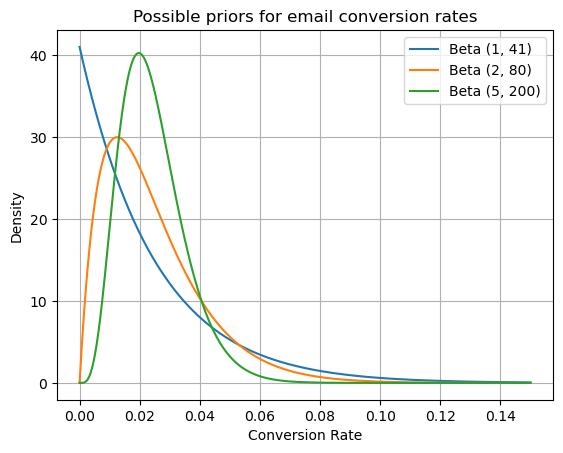

In [ ]:
# p140
# from scipy.stats import beta

list_of_ab=[(1,41), (2, 80), (5, 200)]

p_val = np.linspace(0, 0.15, 1000)

for a,b in list_of_ab:
  # Probability Density Function - PDF
  d_val = beta.pdf(x=p_val, a=a, b=b) 
  plt.plot(p_val, d_val, label=f"Beta ({a}, {b})")

plt.xlabel("Conversion Rate")
plt.ylabel("Density")
plt.title("Possible priors for email conversion rates")
plt.legend()
plt.grid()

* $\alpha + \beta$ baisse => wider
* Beta (1, 41) met la plupart de la densité de proba dans les faibles valeur
* On la garde car :
  1. Elle donne 2.4% de conversion rate
  1. C'est le plus faible de nos A_priori
* En étant le plus faible il sera d'autant plus facilement remplacé/ecrasé dès que l'on aura de nouvelles données
* Il faut beaucoup plus de preuves pour faire bouger Beta(5, 200)
* Comme on travaille avec des Beta distribution on a
  * $Beta (\alpha_{posterior} + \beta_{posterior} = Beta(\alpha_{likelihood} + \alpha_{prior}, \beta_{likelihood}+ \beta_{prior}) $

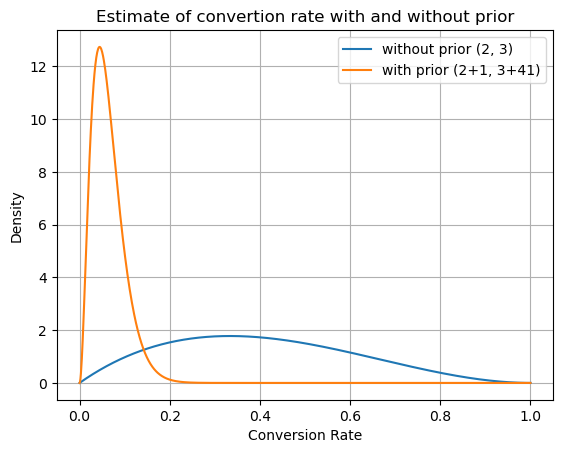

In [ ]:
# p141
# from scipy.stats import beta

p_values = np.linspace(0, 1, 1000)

a = 2
b = 3
# Probability Density Function - PDF
d_values = beta.pdf(x=p_values, a=a, b=b) 
plt.plot(p_values, d_values, label="without prior (2, 3)")
plt.plot()

a = 2 + 1
b = 3 + 41
# Probability Density Function - PDF
d_values = beta.pdf(x=p_values, a=a, b=b) 
plt.plot(p_values, d_values, label="with prior (2+1, 3+41)")
plt.plot()


plt.xlabel("Conversion Rate")
plt.ylabel("Density")
plt.title("Estimate of convertion rate with and without prior")
plt.legend()
plt.grid()


* L'écart type est beaucoup plus resséré. 
* On propose plus d'aller jusqu'à 80%
* En ajoutant notre A_priori (prior, expérience, (1,41)) au Likelihood (vaut (2,3)) ajuste nos croyances (A_posteriori) qui deviennent plus raisonnables
* On pense que sans qu'on attende d'elle des miracles en terme de taux de conversion, notre distribution A_Posteriori est un peu pessimiste 
* On attend
  * On trouve alors que sur 100 mails ouverts 25 pers ont cliqué le lien
  * On met à jour

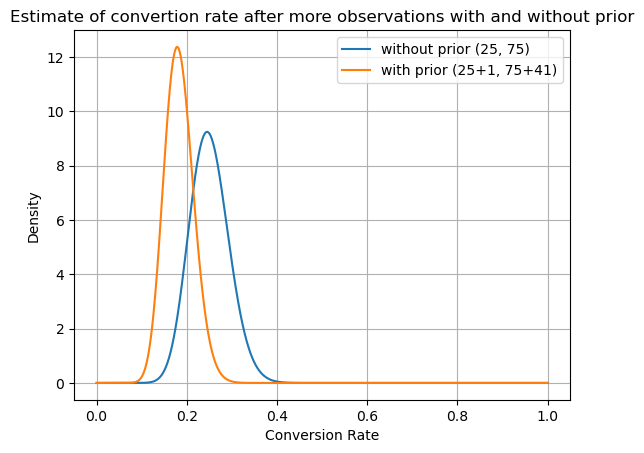

In [ ]:
# p142
# from scipy.stats import beta

p_values = np.linspace(0, 1, 1000)

a = 25
b = 75
# Probability Density Function - PDF
d_values = beta.pdf(x=p_values, a=a, b=b) 
plt.plot(p_values, d_values, label="without prior (25, 75)")
plt.plot()

a = 25 + 1
b = 75 + 41
# Probability Density Function - PDF
d_values = beta.pdf(x=p_values, a=a, b=b) 
plt.plot(p_values, d_values, label="with prior (25+1, 75+41)")
plt.plot()


plt.xlabel("Conversion Rate")
plt.ylabel("Density")
plt.title("Estimate of convertion rate after more observations with and without prior")
plt.legend()
plt.grid()

# je ne comprends pas comment dans le bouquin la courbe sans prior arrive au max à 8 


* Plus on a de données et plus nos croyances a priori diminuent face aux preuves


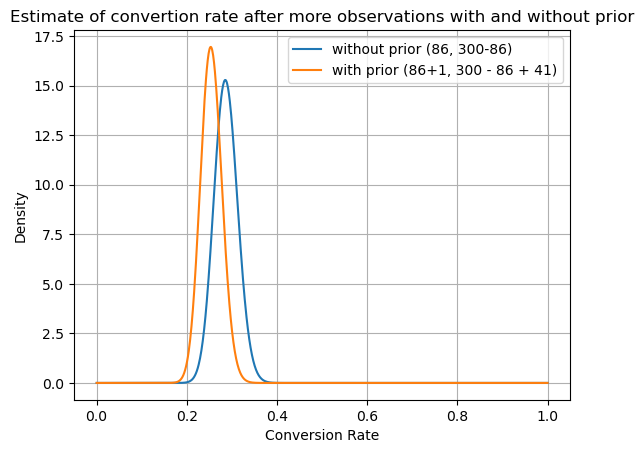

In [ ]:
# p143
# from scipy.stats import beta

p_values = np.linspace(0, 1, 1000)

a = 86
b = 300-86
# Probability Density Function - PDF
d_values = beta.pdf(x=p_values, a=a, b=b) 
plt.plot(p_values, d_values, label="without prior (86, 300-86)")
plt.plot()

a = 86 + 1
b = 300-86 + 41
# Probability Density Function - PDF
d_values = beta.pdf(x=p_values, a=a, b=b) 
plt.plot(p_values, d_values, label="with prior (86+1, 300 - 86 + 41)")
plt.plot()


plt.xlabel("Conversion Rate")
plt.ylabel("Density")
plt.title("Estimate of convertion rate after more observations with and without prior")
plt.legend()
plt.grid()


* IMPORTANT : plus on a de données et plus l'impact du A_Priori (prior) se fait corriger par les faits
* Quand on avait peu de données, le likelihood proposait pour l'intervalle de confiance à 95% des probas ridicules (80% de taux de click par ex.)
* Avec quelques preuves (2.4%) le A_Priori (prior) a supprimé l'influence du peu de données qu'on avait
* Alors qu'on continue à collecter des données qui ne sont pas en accord avec notre expérience A_Priori (prior) notre croyance A_Posteriori se decalle vers ce que les données indiquent et s'éloigne du A_Priori (prior) initial
* On a commencé avec un A_Priori (prior) faible. 
* Même avec ça et avec quelques données en plus on a un A_Posteriori qui semble beaucoup plus raisonnable
* En absence de donnée, le A_Priori (prior) permet d'avoir une estimation beaucoup plus réaliste
* Attention, ici le A_Priori (prior) se basait sur des vraies infos (2.4%). 
* Très souvent on a rien pour justifier le prior...

Si on a rien...

* Obtenir des infos des experts. 
* Si on nous dit 20% alors on peut prendre un Beta (2, 8)
* C'est une suppostion mais c'est une hypothèse qu'on peut quantifier
* Si l'expert est sûr de son coup et dit 20% alors on peut tenter Beta(200, 800)
* Alors qu'on collecte des données en plus on peut faire evoluer l'intervalle de confiance

* Quand on a aucun A_Priori (prior), ajouter 1 à alpha et beta. Beta (alphe+1, beta+1)
* Beta (1,1) = Non informative prior 


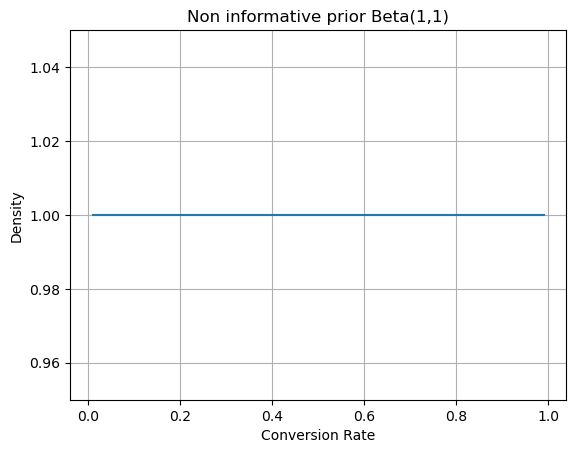

In [ ]:
# p144
# from scipy.stats import beta

p_values = np.linspace(0.01, 0.99, 1000)

a = 1
b = a
# Probability Density Function - PDF
d_values = beta.pdf(x=p_values, a=a, b=b) 
plt.plot(p_values, d_values)
plt.plot()

plt.xlabel("Conversion Rate")
plt.ylabel("Density")
plt.title("Non informative prior Beta(1,1)")
plt.grid()
_=plt.ylim(0.950, 1.050)


* toutes les valeurs ont la même proba
* la moyenne est 0.5

IMPORTANT
* Ca sert à rien de parier sur le lever du soleil de demain car on ne connait pas de contre exemple.
* Il n'y a pas de fair A_Priori (prior) quand on a un manque total de données

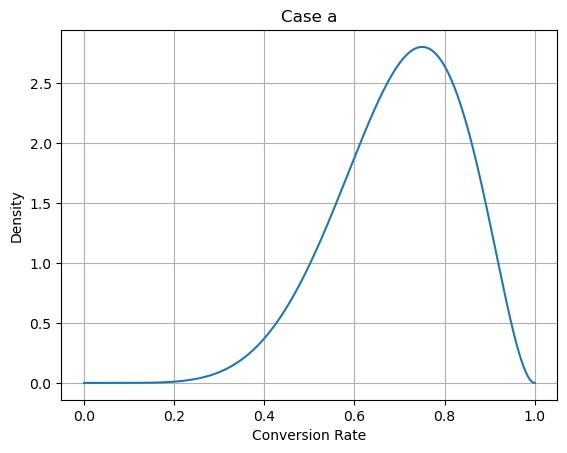

In [ ]:
# 1 p146

# Suppose you’re playing air hockey with some friends and flip a coin to see who starts with the puck. 
# After playing 12 times, you realize that the friend who brings the coin almost always seems to go first: 9 out of 12 times. 
# Some of your other friends start to get suspicious. 

# Define prior probability distributions for the following beliefs:
#     a - One person who weakly believes that the friend is cheating and the true rate of coming up heads is closer to 70 percent.
#     b - One person who very strongly trusts that the coin is fair and provided a 50 percent chance of coming up heads.
#     c - One person who strongly believes the coin is biased to come up heads 70 percent of the time.

# a - One person who weakly believes that the friend is cheating and the true rate of coming up heads is closer to 70 percent.
# Je comprends pas ce qui est demandé instantanément
# Prior probability distribution ?
# 
p_values = np.linspace(0, 1, 1000)

# a/(a+b) = P%
# => b = a(1-P%)/P%
# P=70 => b = a * 0.42
# Using Excel
# 1	  0,428
# 2	  0,857
# 3	  1,285
# 4	  1,714
# 5	  2,142
# 6	  2,571
# 7	  3
# 8	  3,428
# 9	  3,857
# 10	4,285
# 11	4,714
# 12	5,142
# 13	5,571
# 14	6

# Weakly => alpha and beta low

a = 7
b = 3
d_values = beta.pdf(x=p_values, a=a, b=b) 
plt.plot(p_values, d_values)
plt.plot()

plt.xlabel("Conversion Rate")
plt.ylabel("Density")
plt.title("Case a")
plt.grid()



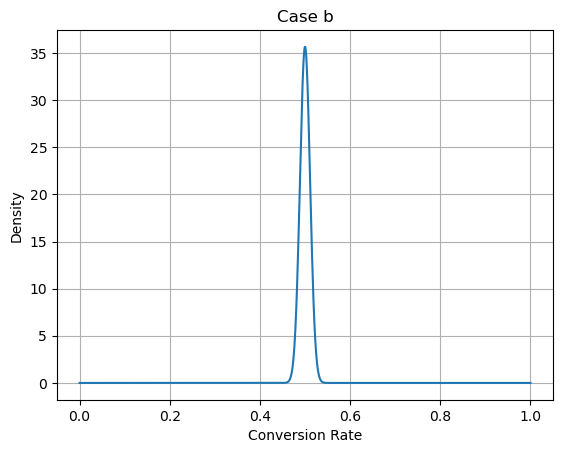

In [ ]:
# b - One person who very strongly trusts that the coin is fair and provided a 50 percent chance of coming up heads.

p_values = np.linspace(0, 1, 1000)

# a/(a+b) = P%
# => b = a(1-P%)/P%
# P=50 => b = a 
# Strongly => a and b high

a = 1000
b = 1000
d_values = beta.pdf(x=p_values, a=a, b=b) 
plt.plot(p_values, d_values)
plt.plot()

plt.xlabel("Conversion Rate")
plt.ylabel("Density")
plt.title("Case b")
plt.grid()


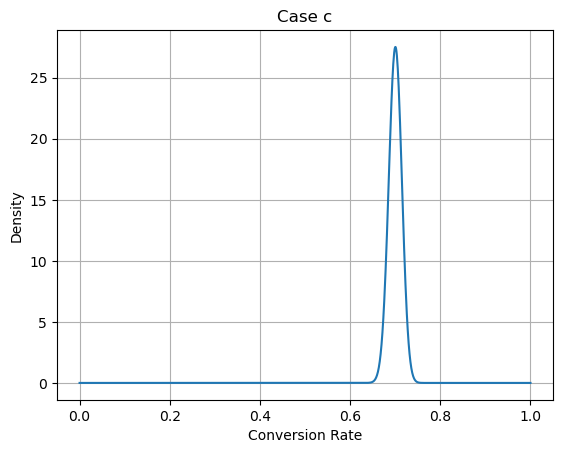

In [ ]:
# c - One person who strongly believes the coin is biased to come up heads 70 percent of the time.

p_values = np.linspace(0, 1, 1000)

# see case a 
# strongly => alpha and beta high
# try 70 30
a = 700 
b = 300
d_values = beta.pdf(x=p_values, a=a, b=b) 
plt.plot(p_values, d_values)
plt.plot()

plt.xlabel("Conversion Rate")
plt.ylabel("Density")
plt.title("Case c")
plt.grid()


  * $Beta (\alpha_{posterior} + \beta_{posterior} = Beta(\alpha_{likelihood} + \alpha_{prior}, \beta_{likelihood}+ \beta_{prior}) $


(0.44504782337068916, 0.7368320053113375)


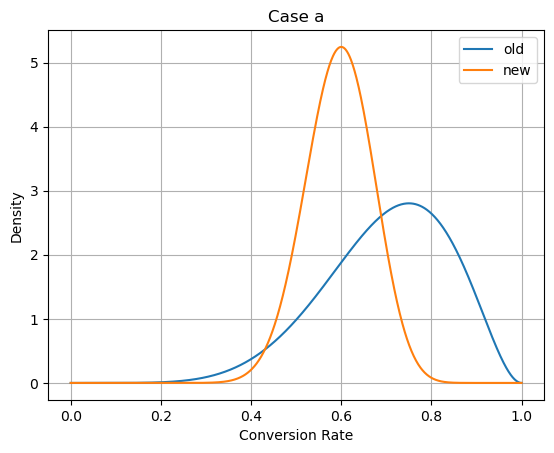

In [ ]:
# 2 p146
# To test the coin, you flip it 20 more times and get 9 heads and 11 tails.
# Using the priors you calculated in the previous question, what are the updated posterior beliefs in the true rate of flipping a heads in terms of the 95 percent confidence interval?

p_values = np.linspace(0, 1, 1000)

a = 7
b = 3
d_values = beta.pdf(x=p_values, a=a, b=b) 
plt.plot(p_values, d_values, label="old")
plt.plot()


# avant on avait 12 essais 
a = 9 
b = 3
# On en rajoute 20 a = 9 et b= 11
a = a + 9   
b = b + 11
# On tient compte du prior a = 7 et b = 3
a = a + 7
b = b + 3
print(beta.interval(0.95, a=a, b=b) )

d_values = beta.pdf(x=p_values, a=a, b=b) 
plt.plot(p_values, d_values, label="new")
plt.plot()

plt.xlabel("Conversion Rate")
plt.ylabel("Density")
plt.title("Case a")
plt.legend()
plt.grid()




(0.4792511415152552, 0.5227155272566064)


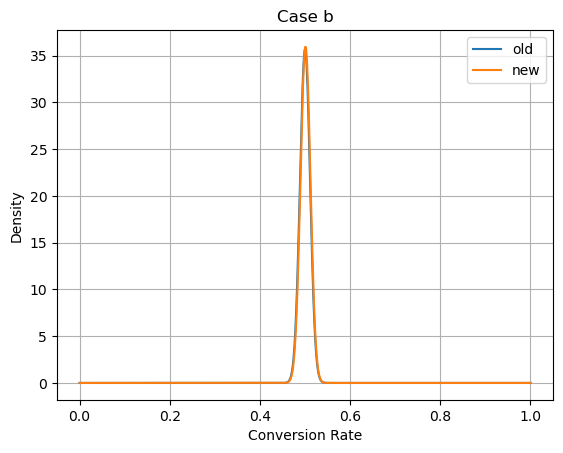

In [ ]:


p_values = np.linspace(0, 1, 1000)

a = 1000
b = 1000
d_values = beta.pdf(x=p_values, a=a, b=b) 
plt.plot(p_values, d_values, label="old")
plt.plot()


a = 9 +  9 + 1000 
b = 3 + 11 + 1000
print(beta.interval(0.95, a=a, b=b) )

d_values = beta.pdf(x=p_values, a=a, b=b) 
plt.plot(p_values, d_values, label="new")
plt.plot()

plt.xlabel("Conversion Rate")
plt.ylabel("Density")
plt.title("Case b")
plt.legend()
plt.grid()



(0.5843152658326919, 0.7442339112415738)


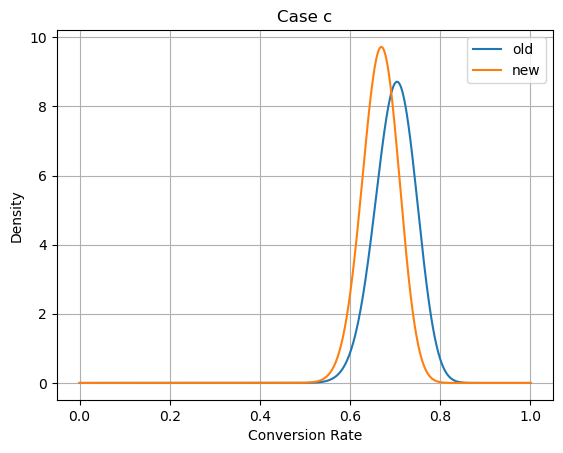

In [ ]:
p_values = np.linspace(0, 1, 1000)

a = 70
b = 30
d_values = beta.pdf(x=p_values, a=a, b=b) 
plt.plot(p_values, d_values, label="old")
plt.plot()

a = 9 +  9 + 70  
b = 3 + 11 + 30
print(beta.interval(0.95, a=a, b=b) )

d_values = beta.pdf(x=p_values, a=a, b=b) 
plt.plot(p_values, d_values, label="new")
plt.plot()

plt.xlabel("Conversion Rate")
plt.ylabel("Density")
plt.title("Case c")
plt.legend()
plt.grid()





# Chap 15 - From parameter estimation to hypothesis testing : building a Bayesian A/B test  

1. On "décide" de la distribution des priors
    * On prend un truc assez weak beta(3,7) avec une moyenne à 30 car c'est ce que l'on avait eu dans des mailings précédents
1. On envoie les 2 versions des mailings
    * On a les taux de clicks
1. beta(alpha_post, beta_post) = beta(alpha_prior + alpha_like, beta_rior + beta_like)
    * On trace les distributions des posteriors de A et B
1. monte carlo sampling sur les posteriors distributions A et B
1. on calcule combien de fois les echantillons de B sont sup à A
1. en affichant B/A on peut dire de combien B est meilleur que A (+40% <=> 1.4 fois)
1. empirical CDF de B/A pour une analyse fine de B vs A

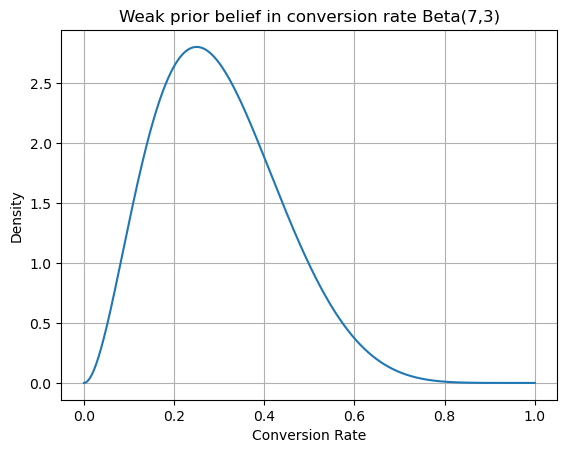

In [ ]:
# p151
p_values = np.linspace(0, 1, 1000)

a = 3
b = 7
d_values = beta.pdf(x=p_values, a=a, b=b) 
plt.plot(p_values, d_values)
plt.plot()

plt.xlabel("Conversion Rate")
plt.ylabel("Density")
plt.title("Weak prior belief in conversion rate Beta(7,3)")
plt.grid()

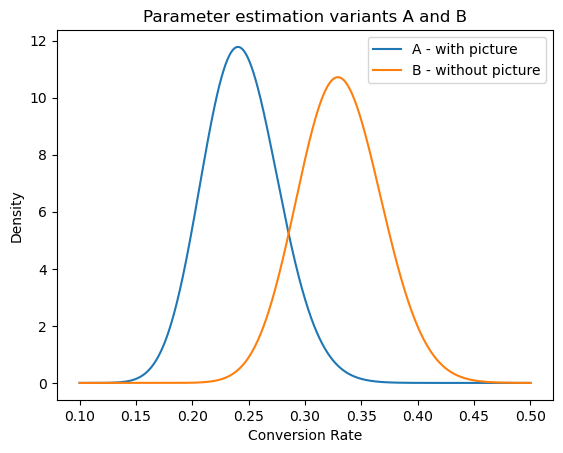

In [ ]:
# p152

p_values = np.linspace(0.1, 0.5, 1000)

a = 3 + 36
b = 7 + 114
d_values = beta.pdf(x=p_values, a=a, b=b) 
plt.plot(p_values, d_values, label="A - with picture")
plt.plot()

a = 3 + 50  
b = 7 + 100
d_values = beta.pdf(x=p_values, a=a, b=b) 
plt.plot(p_values, d_values, label="B - without picture")
plt.plot()

plt.xlabel("Conversion Rate")
plt.ylabel("Density")
plt.title("Parameter estimation variants A and B")
plt.legend();
# plt.grid()

In [99]:
# p153

n_trials    = 100_000
prior_alpha = 3
prior_beta  = 7

# This is the monte carlo part of the process
# Generate n_trials samples from A and B distribution
# Each sample is chosen based on its proba in the distribution
# Bien voir que comme on fait la somme des alpha et beta, A_samples et B_samples sont des posterior distributions
A_samples = beta(36 + prior_alpha, 114 + prior_beta).rvs(n_trials)
B_samples = beta(50 + prior_alpha, 100 + prior_beta).rvs(n_trials)

# Compte le nombre de fois où le sample B est sup au sample A
B_superior = np.sum(B_samples>A_samples) /n_trials
print("Nb of time where B samples > A samples : ", (B_superior*100).round(3), "%")


Nb of time where B samples > A samples :  95.93 %


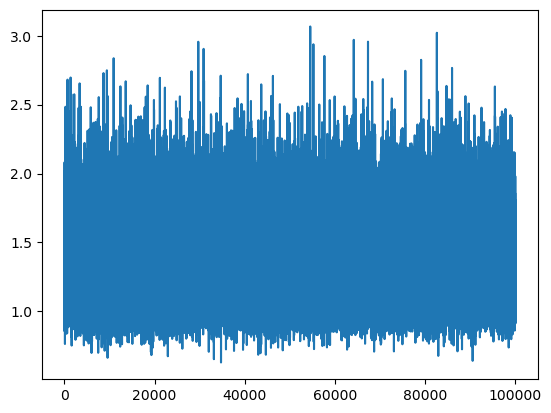

In [ ]:
# p155
ratio = B_samples/A_samples
_= plt.plot(ratio)


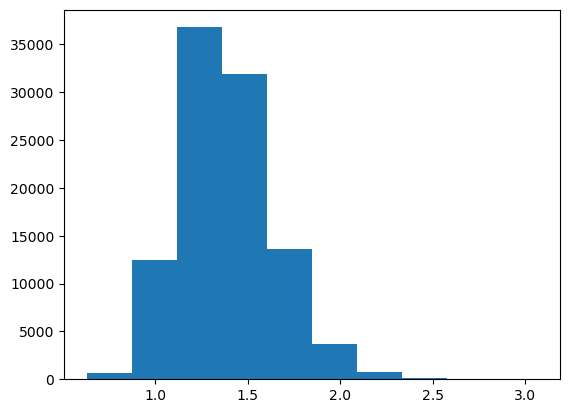

In [ ]:
_ = plt.hist(ratio)

In [ ]:
# p 155

print("Moyenne : ", ratio.mean())

Moyenne :  1.3858965503887724


Donc B est 38% plus efficace que A

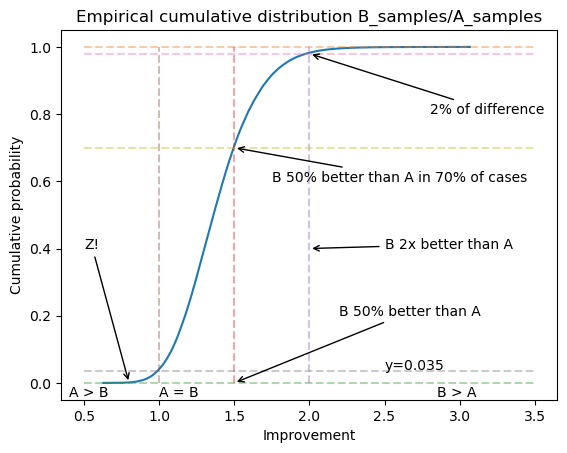

In [ ]:
# p155

def hline(y):
  plt.plot((0.5, 3.5),(y, y), linestyle='dashed', alpha=0.4)

def vline(x):
  plt.plot((x, x),(0.0, 1.0), linestyle='dashed', alpha=0.4)


def my_ecdf(x):
  xs = np.sort(x)
  ys = np.arange(1, len(xs)+1)/float(len(xs))
  return xs, ys

xs, ys = my_ecdf(ratio)
plt.plot(xs, ys)

plt.xlabel("Improvement")
plt.ylabel("Cumulative probability")
plt.title("Empirical cumulative distribution B_samples/A_samples");


hline(1.0)    # draw a H doted line at y=1
hline(0.0)    # draw a H doted line at y=0
vline(1.5)    # draw a V doted line at y=1.5
vline(2.0)    # draw a V doted line at y=2.0 
vline(1.0)    # draw a V doted line at y=1.0
hline(0.98)   # draw a H doted line at y=.980 (cross v line at x = 2.0)
hline(0.035)  # draw a H doted line at y=.035 (cross v line at x = 1.0)
hline(0.70)   # draw a H doted line at y=.070 (cross v line at x = 1.5)

plt.text(0.4, -0.04, 'A > B')
plt.text(1.0, -0.04, 'A = B')
plt.text(2.85, -0.04, 'B > A')
plt.text(2.5, 0.04, 'y=0.035')

plt.annotate("B 50% better than A", xy=(1.5, 0.0), xytext=(2.2, 0.2), arrowprops=dict(arrowstyle="->"))
plt.annotate("B 50% better than A in 70% of cases", xy=(1.5, 0.7), xytext=(1.75, 0.6), arrowprops=dict(arrowstyle="->"))
plt.annotate("B 2x better than A",  xy=(2.0, 0.4), xytext=(2.5, 0.4), arrowprops=dict(arrowstyle="->"))
plt.annotate("2% of difference",  xy=(2.0, 0.98), xytext=(2.8, 0.8), arrowprops=dict(arrowstyle="->"))
plt.annotate("Z!",  xy=(0.8, 0.0), xytext=(0.5, 0.4), arrowprops=dict(arrowstyle="->"));

### Comment lire le graphe ?
* Partir du haut à droite
* Suivre la courbe 
* Aller en bas à gauche
* Au dessus des abscisses, repérer les zones où A > B (à gauche), B = A (quand x = 1), B > A (à droite)

### Commentaires
* Le modèle B est beaucoup plus souvent supérieur au modèle A que le contraire
  * Encore une fois, faut repérer les zones où A > B (à gauche), B = A (quand x = 1), B > A (à droite)
  * La zone A > B, à gauche de x = 1 est petite comparée à la zone B > A
* Quand x = 1 on est au point où modèle A = modèle B
  * L'ordonnée vaut alors 0.035
  * Cela veut dire que dans 1 - 0.035 = 96.5% des cas le modèle B est supérieur au modèle A
* Quand x = 2.0 cela veut dire que le modèle B est 2.0 fois meilleur au modèle A. 
  * B est 100% meilleur que A. 
  * Il faut aller tout en haut et estimer la différence entre la courbe et la droite horizontale y = 1.0
  * On lit 2% de différence
  * Cela veut dire que le modèle B est 2 fois meilleur que le modèle A dans 2% des cas 
* Quand x = 1.5 cela veut dire que B est 1.5 fois meilleur que A. 
  * B est donc alors 50% meilleur que A
  * Si on dit qu'alors la difference entre la courbe et la droite horizontale y = 1 vaut 0.30 (1.0 - la H ligne à 70%)
  * Cela veut dire que dans 30% des cas, B est 50% meilleur que A
* Le Z! pointe sur x = 0.8
  * On peut dire que "la chance que B soit 20% moins bon que A (en x = 0.8) est similaire à celle que B soit 100% (x=2) meilleur que A"
  * En effet : 
    * en x = 0.8, la difference entre la courbe et l'horizontale y = 0 
    * est à peu près égale à 
    * la différence entre la courbe et l'horizontale y = 1 quand x = 2  
  * Et ça, ça claque en conseil d'administration !

# Chap 16 - Introduction to the Bayes factor and posterior ODDs : the competition of ideas  

* Bayses Factor
* Permet de compare des hypothèses
* $ P(H | D) = \frac{P(H, D)}{P(D)} = \frac{P(H)P(D|H)}{P(D)} $
* $ P(H | D) \text{ } \alpha \text{ } P(H) * P(D|H)$


Bayes Factor :
* Rappor des vraissemblance
* On considès que D est identique et qu'on mesure se brobabilité à l'aune de D_1 ou D_2
* le rapport de la vraissemblance de notre hypothèse face aux données VS la vraissemblance de l'autre hypothèse fauce aux **mêmes** données
* Permet aussi de savoir si il est temps de change nos croyances
* $BF = \frac{P(D|H_1)}{P(D|H_2)}$

Prio Odds :
* Les hypothèses a priori ne se valent pas
* Aliens vs Salle de Bain
* On compare les probas "en l'état de nos connaissances", avant d'avoir accès aux données
* $O(H_1 = \frac{P(H_1)}{P(H_2)}$
* Si $O(H_1$ vaut 100, alors on pense que $H_1$ est 100 fois plus probable que $H_2$

Posterior Odds :
* Ratio of Posteriors
* $ = \frac{P(H_1)P(D|H_1)}{P(H_1)P(D|H_1)} $
* $ = O(H_1) * \frac{P(D|H_1)}{P(D|H_2)}$

Ordre de grandeur à retenir :
* 1 à 3 : interressant mais rien de concluant
* 3 à 20 : on est sur un truc
* 20 à 150 : forte preuve en faveur de H1
* \>150 : plus de question à se poder en faveur de H1





* Sac avec 3 dés
* 1 dés est pipé
* On sort 1 dé. On tire 10 fois. On sort 4 six
* Si il est pipé avec une proba 1/2, $P(D|H_1) = (\frac{1}{2})^{4} * (\frac{1}{2})^{6}$
* Dé normal, proba de sortir 6 six sur 10 jets, $P(D|H_2) = (\frac{1}{6})^{4} * (\frac{1}{6})^{6}$


In [ ]:
# p 161

# H1 pipé
P_D_Sachant_H1 =(1/2)**4 * (1/2)**6

# H2 pas pipé
P_D_Sachant_H2 =(1/6)**4 * (5/6)**6

BF = P_D_Sachant_H1/P_D_Sachant_H2
print(BF)

3.7791359999999994


MAIS... On tient pas compte du prior odds
* $P(H_1) = 1/3$
* $P(H_2) = 2/3$
* $O(H_1) = 1/2$

In [ ]:
posterior_odds = 1/2 * BF
print(posterior_odds)

1.8895679999999997


On peut pas trop conclure...

In [ ]:
# p 163
P_D_Sachant_H1 = .94 * .83
P_D_Sachant_H2 = .63 * .55
BF = P_D_Sachant_H1/P_D_Sachant_H2
P_H1 = 11/1_000_000
P_H2 = 37_000/1_000_000
O_H1 = P_H1/P_H2
Posterior_Odds = O_H1 * BF
print(1/Posterior_Odds)



1493.8477313509356


H2 est 1500 fois plus probable que H1. On va pas mourir de suite.

In [ ]:
# 1 p165

# 2 dés pipés

# H1 pipé
P_D_Sachant_H1 =(1/2)**4 * (1/2)**6
# H2 pas pipé
P_D_Sachant_H2 =(1/6)**4 * (5/6)**6
BF = P_D_Sachant_H1/P_D_Sachant_H2
print(BF)

P_H1 = 2/3
P_H2 = 1/3
O_H1 = P_H1/P_H2

Posterior_Odds = O_H1 * BF
print(Posterior_Odds)




3.7791359999999994
7.558271999999999


In [ ]:
# 2 p165

# symptomes persistent
# + vertiges
# docteur propose labyrinthitis implique 
# vertiges à 98%
# perte ecoute 30%
# tinnitus 28%
# 35/1_000_000

# vertige aussi possible avec vestibular schannoma
# vertige 49% des cas
# perte ecoute 94%
# tinnitus 83%
# 11/1_000_000

# Posterior Odds compare labyrinthitis vs vestibular


# H1 = labyrinthitis
P_D_Sachant_H1 = .98 * .30 * .28
# print(P_D_Sachant_H1)
# H2 = vestibular schannoma
P_D_Sachant_H2 = .49 * .94 * .83
# print(P_D_Sachant_H2)

# <Je crois qu'il y a une erreur dans la correction
# je trouve 0.21 vs 0.48 avec les même chiffres... Bizarre
BF = P_D_Sachant_H1/P_D_Sachant_H2
print("Bayes Factor   : ", BF)

P_H1 = 35/1_000_000
P_H2 = 11/1_000_000
O_H1 = P_H1/P_H2
print("Odds ratio     : ", O_H1)
Posterior_Odds = O_H1 * BF
print("Posterior Odds : ", Posterior_Odds)

# labyrinthitis est encore une moins bonne explication


Bayes Factor   :  0.21532940271725204
Odds ratio     :  3.1818181818181817
Posterior Odds :  0.6851390086458019


# Chap 17 - Bayesian reasoning in the twilight zone 

* Comment on explique que 2 personnes ayant accès aux mêmes données arrivent à des conclusion si differentes ?
* $BF = \frac{P(D|H_1)}{P(D|H_2)}$

* Etre capable de déterminer la quantité de preuves nécessaire pour convaincre une personne
* Estimer la conviction d'une personne dans son opinion


In [ ]:
# p 169
# H      can predict => P_D = 1
# H_bar just lucky   => P_D_Sachant_H_Bar = (1/2)**n

# BF = P_D / P_D_Sachant_H_Bar
# Si 3 réponses
P_D = 1
n = 3
P_D_Sachant_H_Bar = (1/2)**n
BF_3 = P_D / P_D_Sachant_H_Bar
print(BF_3)

8.0


Ordre de grandeur à retenir :
* 1 à 3 : interressant mais rien de concluant
* 3 à 20 : on est sur un truc
* 20 à 150 : forte preuve en faveur de H1
* \>150 : plus de question à se poder en faveur de H1


In [ ]:
# p171

# On choisit de dire que  
O_H = 1/1_000_000
print("Prior Odds     : ", O_H)

# Pour 5 bonnes réponses
P_D = 1
n = 5
P_D_Sachant_H_Bar = (1/2)**n
BF_5 = P_D / P_D_Sachant_H_Bar
print("Bayes Factor   : ", BF_5)

posterior_odds = O_H * BF_5
print("Posterior Odds : ", posterior_odds)





Prior Odds     :  1e-06
Bayes Factor   :  32.0
Posterior Odds :  3.2e-05


* On est pas du tout convaincu.
* On peut calculer le nombre d'essais qui nous convaincraient

In [ ]:
#p 171
# Pour convaincre il faut Posterior Odds sup à 2
# 1/1000_000 * 1/0.5**n > 2

n = math.log(2 * 1_000_000)/math.log(2)
print(n)

20.931568569324174


In [ ]:
# p172

# convaincu => posterior_odds = 150
# Il est convaicu à partir de 7 jets
# on cherche le prior odds de Don

# 150 = O_H_Don * 1/0.5**7
O_H_Don = 150 * 0.5**7
print(O_H_Don)

1.171875


Ca veut dire que Don était légèrement plus à croire qu'à ne pas croire

In [ ]:
# p172
# Pat a besoin de 14 essais pour commencer à voir un truc => 5

# 5 = O_H_Pat * 1/0.5**14
O_H_Pat = 5 * 0.5**14
print(O_H_Pat)
print(1/O_H_Pat)

0.00030517578125
3276.8


Ca veut dire que Pat qu'il y a 1 chance sur 3 000 qu'elle soit en face d'un phénomène supernaturel

In [ ]:
# 1 p173

# H => cheat    => 1
# H_Bar => fair => 1/2
n = 10
P_D10_H = 1
P_D10_H_Bar = 1/2**n
BF = P_D10_H / P_D10_H_Bar
print(BF)

# Ca ne nous dit rien

1024.0


In [ ]:
# 2 p173

prankster = 9/10 # cheat 9 times over 10
honest = 3/10    # cheat 3 times over 10
trust = 1/100_000     # never cheat

# p18 
# P(H) = O(H)/1+O(H)
# => O(H) = P(H)/1-P(H) 

# O(H) = P(H)/P(H_bar)
prior_odds_prankster = prankster/(1-prankster) * BF 
prior_odds_honest = honest/(1-honest) * BF 
prior_odds_trust = trust/(1-trust) * BF 

print(prior_odds_prankster)
print(prior_odds_honest)
print(prior_odds_trust)

9216.000000000002
438.8571428571429
0.01024010240102401


Cela veut dire
Je crois 1000 fois plus qu'il a tricher plutôt que "il n'a pas triché"
Je pense 300 fois plus ...
Je pesne qu'il n'a pas triché

In [ ]:
# 3 p173

# prior odds them cheating = 1/10 000
# Combien de fois la piece doit tomber sur Face pour douter (posterior odds=1)

# PO = O(H) * BF
# 1 = 1/10_000 * 1/0.5**n
# 10_000 = 2**n

print(math.log(10_000)/math.log(2))

13.28771237954945


In [ ]:
# 4 p173
# Another friend of yours also hangs out with this same friend and, after only four weeks of the coin landing on heads, feels certain you’re both being cheated. 
# This confidence implies a posterior odds of about 100. 
# What value would you assign to this other friend’s prior belief that the first friend is a cheater?

# 4 semaine (1/2)**4

# PO = O(H_new) * BF
# 100 = O(H_new) * 1/ (1/2)**4

O_H_new = 100 / (1/(1/2)**4)
print(O_H_new)


6.25


# Chap 18 - When data does'nt convince you  

* Bayes factor = competition d'idées
* La bayes factor = rapport de vraissemblances => donne des résultats étonant
* Il faut pas oublier le Odds ratio O(H)
  * On peut s'amuser à le fixer de telle sorte que le posterior odds = 1
  * Ca donne un point de déport si jamais on a de nouvelles données qui arrivent. 
  * On pourra calculer le posterior odds avec ce prio odds (voir p 177)
* quand 2 hypothèses expliquent les faits aussi bien l'une que l'autre 
  * c'est pas la pein d'ajouter des données
  * Il ne reste que le prior odds ratio pour les comparer
  * Il faut se demander ce qui ferait varier notre "a priori", notre avis "en l'état des connaissances"

Penser à 
* Pas hésiter à utiliser une 3eme hypothèse
* Le problème c'est pas les données, c'est les modèles, les théories
* On change d'hypothèse mais pas les données
* On calcule Posterior Odds en comparant H2 et H3. Y aura un nouveau O(H2)
* 
Penser à 
* quelles preuves te feraient changer d'avis
* Si le prior vaut 0 alors on peut strictement rien faire
* Si le prior vaut 1 pareil
* Faut eviter les gens qui sont à 0 ou 1
* Un abruti c'est une personne à 0 ou 1 ou qui ne fait pas évoluer ses a priori

In [ ]:
# 1 p181
# When two hypotheses explain the data equally well, one way to change our minds is to see if we can attack the prior probability. 
# What are some factors that might increase your prior belief in your friend’s psychic powers?

# C'est subjectif... Non?
# Faudrait que je sois plus enclin à y croire
# 

In [ ]:
# 2 p181
# An experiment claims that when people hear the word Florida, they think of the elderly and this has an impact on their walking speed. 
# To test this, we have two groups of 15 students walk across a room; 
#   one group hears the word Florida 
#   and one does not
# Assume H1 = the groups don’t move at different speeds
# and    H2 = the Florida group is slower because of hearing the word Florida

# Also assume:  BF = P(D|H2) / P(D|H1)

# The experiment shows that H2 has a Bayes factor of 19. 
# Suppose someone is unconvinced by this experiment because H2 had a lower prior odds. 
# What prior odds would explain someone being unconvinced and what would the BF need to be to bring the posterior odds to 50 for this unconvinced person?

# Pas convaincu => Prior Odds = 1/19
# Posterior Odds = 50 = Prior_Odds * BF
BF = 50 * 19
print(BF)



# Now suppose the prior odds do not change the skeptic’s mind. 
# Think of an alternate H3 that explains the observation that the Florida group is slower. 
# Remember if H2 and H3 both explain the data equally well, only prior odds in favor of H3 would lead someone to claim H3 is true over H2
# So we need to rethink the experiment so that these odds are decreased.
# Come up with an experiment that could change the prior odds in H3 over H2.

# Plus de test avec d'autres groupes




950


# Chap 19 - From hypothesis testing to parameter estimation

* On a utiliser posteriors odds (les cotes a posteriori) pour comparer 2 théories/hypothèses
* On veut pouvoir en comparer un nb important
* Ici on passe d'un nb infini d'hypothèses en utilisant Bayes factore et posteriors odds à une sorte d'estimation de paramètre

In [ ]:
# p184

# fete foraine
# canards
# forain dit 1/2, client dit 1/20

P_H1 = 1/2
P_H2 = 1/20

# On regarde 100 jeux, 24 gains

P_D_sachant_H1 = (1/2)**24 * (1-1/2)**76
P_D_sachant_H2 = (1/20)**24 * (1-1/20)**76

BF = P_D_sachant_H2/P_D_sachant_H1
print("1/BF = :", 1/BF)

1/BF = : 652.7191094519916


In [ ]:
# H1 explique 653 fois mieux le résultat du test ?
# Bizarre
# Test avec la loi binomiale d'avoir 24 sur 100 si proba 1/2


print(binom.pmf(24, 100, 1/2))


6.293222718589577e-08


In [ ]:
# p186
# faut tenir compte des priors et donc de O(H2)
# On a pas d'idée on pourrait prendre O(H2/H1) = 1 mais ça contredi notre intuition que le gars triche
# Si on veut un posterior odds en faveur du client faudrait O(H2/H1) >= 652


# Considerer une 3eme thérorie/alternative
# Peut être que c'est pas 1/20 comme le dit le client mais un autre chiffre
# Si au lieu de 5% (1/20) on passe à 20% (2/10)

P_D_sachant_H1 = (1/2)**24 * (1-1/2)**76
P_D_sachant_H3 = (2/10)**24 * (1-2/10)**76

BF = P_D_sachant_H3/P_D_sachant_H1
print("1/BF = :", BF)

1/BF = : 917399.4463960337


* Sans tenir compte du prior ratio
* H3 explique 1 000 fois mieu le résultat que H2
* En fait le client était donc très loin de la réalité en disant 1/20


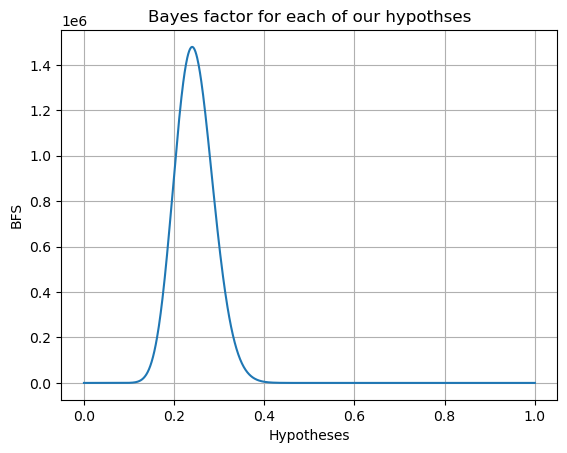

In [ ]:
# p187

n = 1000
hypotheses = np.linspace(0, 1, n)


def bf (htop, bottom):
  num = htop**24 * (1-htop)**76
  denom = bottom**24 * (1-bottom)**76
  return num/denom

bfs = bf(hypotheses, 1/2)

plt.plot(hypotheses, bfs)

plt.xlabel("Hypotheses")
plt.ylabel("BFS")
plt.title("Bayes factor for each of our hypothses")
plt.grid()



In [ ]:
# p187

print(max(bfs))
print(hypotheses[np.argmax(bfs)])

1478752.5717556716
0.24024024024024024


* A probability of 24% is our best guess
* On a pris l'hypothese qui explique les données le mieux car on a pas le moyen de pondérer les estimation par leur probabilité d'occurence

### On va ajouter de la pondération

* Un client dit que jamais le taux de gaine ne sera entre 20 et 30%. 
* C'est comme ça

On a donc des a priori dont il faut tenir compte :
* On fait un tableau de priors odds

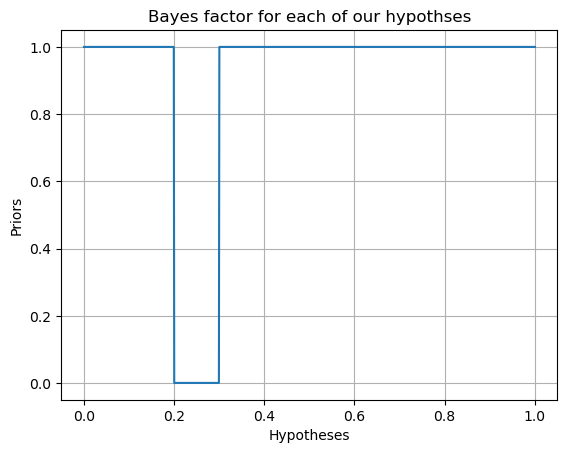

In [ ]:
# p188

priors = np.ones(n)
priors[(hypotheses>=0.2) & (hypotheses<=0.3)] = 1/1000

plt.plot(hypotheses, priors)

plt.xlabel("Hypotheses")
plt.ylabel("Priors")
plt.title("Bayes factor for each of our hypothses")
plt.grid()


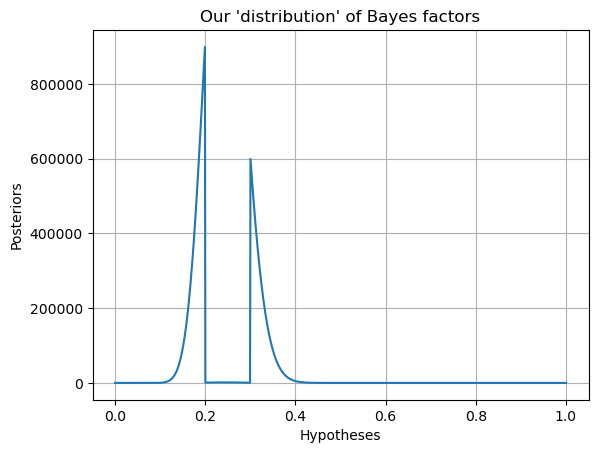

In [ ]:
# p189

posteriors = bfs * priors
plt.plot(hypotheses, posteriors)

plt.xlabel("Hypotheses")
plt.ylabel("Posteriors")
plt.title("Our 'distribution' of Bayes factors")
plt.grid()


Sum of the posteriors distribution :  1.0000000000000002


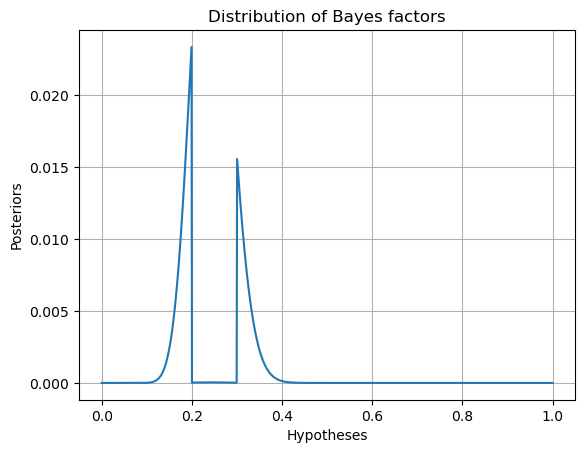

In [ ]:
# p190

# need to normalize

posteriors = posteriors/posteriors.sum()
print("Sum of the posteriors distribution : ", posteriors.sum())

plt.plot(hypotheses, posteriors)

plt.xlabel("Hypotheses")
plt.ylabel("Posteriors")
plt.title("Distribution of Bayes factors")
plt.grid()


In [ ]:
# p191

# What is the probability that the true rate of getting a prize is less than 1/2 (attendant claim)
posteriors[hypotheses<0.5].sum()

0.9999997589906652

In [ ]:
# p191

# Expectation of the distribution
(posteriors*hypotheses).sum()

0.24054531340391858

In [ ]:
# p191

# Puisque la moyenne tombe entre 0.2 et 0.3 on va chercher l'hypothèse la plus probable
# print(max(bfs))
print(hypotheses[np.argmax(posteriors)])

0.1991991991991992


### Estimation de paramètre

* 24 succes et 76 echecs
* ça fait penser à Beta

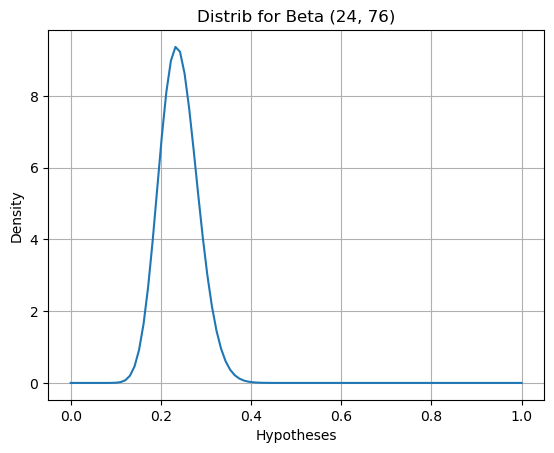

In [ ]:
#  p192

n = 100
a = 24
b = 76
p_values = np.linspace(0, 1, n)

d_values = beta.pdf(p_values, a, b)  
plt.plot(p_values, d_values)

plt.xlabel("Hypotheses")
plt.ylabel("Density")
plt.title("Distrib for Beta (24, 76)")
plt.grid()

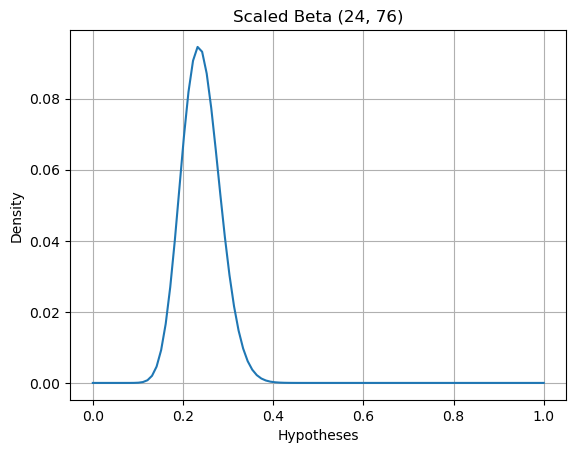

In [ ]:
# p192
# faut mettre à l'echelle

n=100
a = 24
b = 76
p_values = np.linspace(0, 1, n)

d_values = beta.pdf(p_values, a, b)  
d_values = d_values/d_values.sum()
plt.plot(p_values, d_values)

plt.xlabel("Hypotheses")
plt.ylabel("Density")
plt.title("Scaled Beta (24, 76)")
plt.grid()

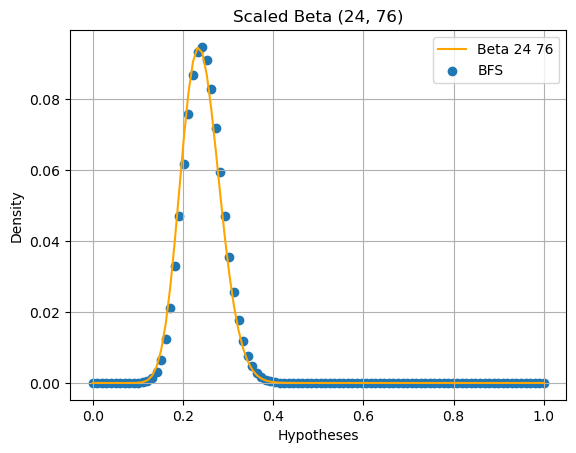

In [ ]:
# p192
# Affiche bfs

def bf (htop, bottom):
  num = htop**24 * (1-htop)**76
  denom = bottom**24 * (1-bottom)**76
  return num/denom

n = 100
a = 24
b = 76

hypotheses = np.linspace(0, 1, n)

d_values = beta.pdf(hypotheses, a, b)  
d_values = d_values/d_values.sum()
plt.plot(hypotheses, d_values, c="orange", label="Beta 24 76")


bfs = bf(hypotheses, 1/2)
bfs = bfs/bfs.sum()
plt.scatter(hypotheses, bfs, label="BFS")


plt.xlabel("Hypotheses")
plt.ylabel("Density")
plt.title("Scaled Beta (24, 76)")
plt.legend()
plt.grid()

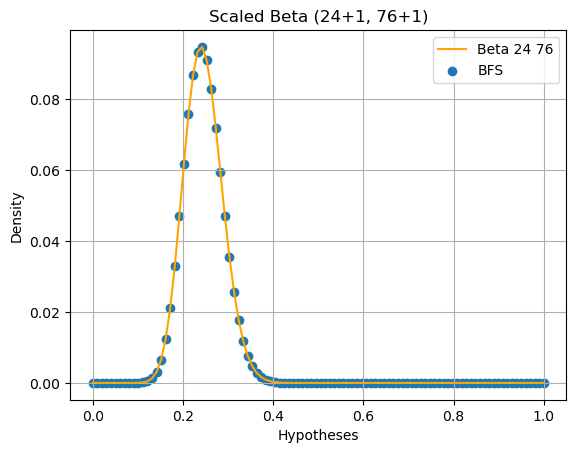

In [ ]:
# p192
# Applique le plus faible des a priori (1,1) pour mieux aligner les courbes

def bf (htop, bottom):
  num = htop**24 * (1-htop)**76
  denom = bottom**24 * (1-bottom)**76
  return num/denom

n = 100
a = 24
b = 76

hypotheses = np.linspace(0, 1, n)

d_values = beta.pdf(hypotheses, a+1, b+1)  
d_values = d_values/d_values.sum()
plt.plot(hypotheses, d_values, c="orange", label="Beta 24 76")


bfs = bf(hypotheses, 1/2)
bfs = bfs/bfs.sum()
plt.scatter(hypotheses, bfs, label="BFS")


plt.xlabel("Hypotheses")
plt.ylabel("Density")
plt.title("Scaled Beta (24+1, 76+1)")
plt.legend()
plt.grid()

In [ ]:
# p192

# On peut retrouver la moyenne
print(hypotheses[np.argmax(bfs)])

print((a+1)/(a+1+b+1))

0.24242424242424243
0.24509803921568626


[]

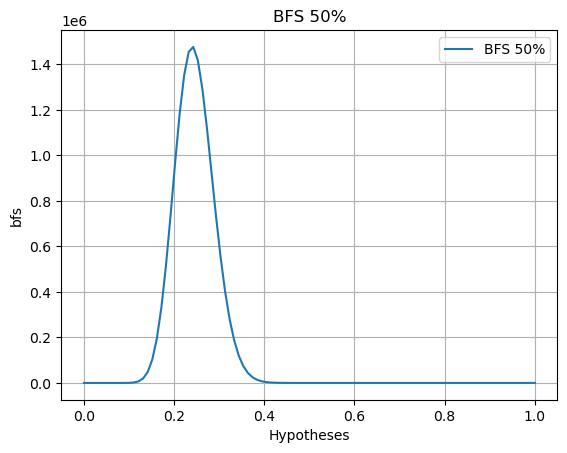

In [ ]:
# 1 p193

# Our Bayes factor assumed that we were looking at H1: P(prize) = 0.5.
# This allowed us to derive a version of the beta distribution with an alpha of 1 and a beta of 1. 

# Would it matter if we chose a different probability for H1 ? 
# Assume H1: P(prize) = 0.24 , then see if the resulting distribution, once normalized to sum to 1, is any different than the original hypothesis.

def bf (htop, bottom):
  num = htop**24 * (1-htop)**76
  denom = bottom**24 * (1-bottom)**76
  return num/denom

n = 100
hypotheses = np.linspace(0, 1, n)
bfs50 = bf(hypotheses, 0.5)
plt.plot(hypotheses, bfs50, label="BFS 50%")

plt.xlabel("Hypotheses")
plt.ylabel("bfs")
plt.title("BFS 50%")
plt.legend()
plt.grid()
plt.plot()

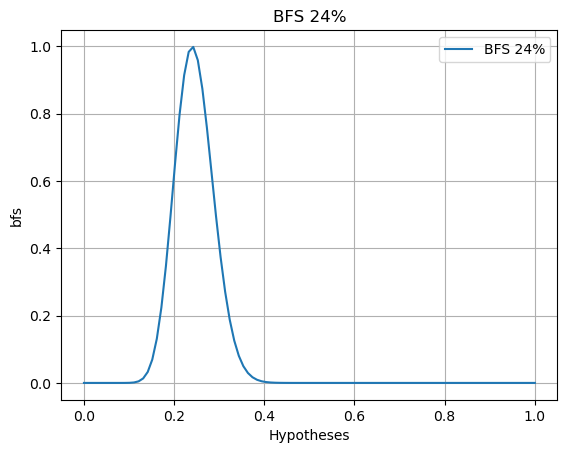

In [ ]:
def bf (htop, bottom):
  num = htop**24 * (1-htop)**76
  denom = bottom**24 * (1-bottom)**76
  return num/denom

n = 100
hypotheses = np.linspace(0, 1, n)
bfs24 = bf(hypotheses, 0.24)
plt.plot(hypotheses, bfs24, label="BFS 24%")

plt.xlabel("Hypotheses")
plt.ylabel("bfs")
plt.title("BFS 24%")
plt.legend()
plt.grid()

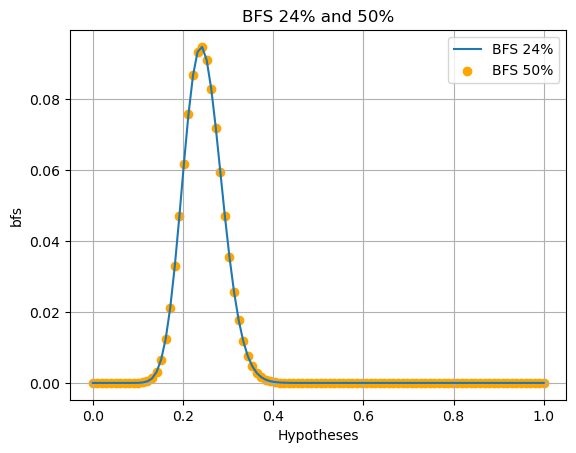

In [ ]:
# Once normalized distributions are exactly the same (shape, amplitude...)

def bf (htop, bottom):
  num = htop**24 * (1-htop)**76
  denom = bottom**24 * (1-bottom)**76
  return num/denom

n = 100
hypotheses = np.linspace(0, 1, n)
bfs24 = bf(hypotheses, 0.24)
bfs24 = bfs24/bfs24.sum()
plt.plot(hypotheses, bfs24, label="BFS 24%")

bfs50 = bf(hypotheses, 0.5)
bfs50 = bfs50/bfs50.sum()
plt.scatter(hypotheses, bfs50, color="orange", label="BFS 50%")


plt.xlabel("Hypotheses")
plt.ylabel("bfs")
plt.title("BFS 24% and 50%")
plt.legend()
plt.grid()

In [ ]:
# 2 p194
# Write a prior for the distribution in which each hypothesis is 1.05 times more likely than the previous hypothesis 
# (assume our dx remains the same).

# A finir

In [ ]:
# 3 p194
# Suppose you observed another duck game that included 34 ducks with prizes and 66 ducks without prizes. 
# How would you set up a test to determine “What is the probability that you have a better chance of winning a prize in this game than in the game we used in our example?”
# Implementing this requires a bit more sophistication than the R used in this book
# but see if you can learn this on your own to kick off your adventures in more advanced Bayesian statistics!


# A/B testing à mettre en place